# SVM Assignment2


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# Anomaly detection(사기감지 데이터) 로드
data = pd.read_csv('creditcard.csv')
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [3]:
X = data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = data[['Class']]

In [4]:
y['Class'].value_counts()

0    284314
1       492
Name: Class, dtype: int64

In [5]:
#데이터 셋 분리 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

In [6]:
#down-sampling
#imbalanced data를 balanced data로 바꾸기 위해서 
#downsampling을 사용했습니다 이때는 resample함수를 사용하였습니다!

from sklearn.utils import resample
X = pd.concat([X_train,y_train],axis=1)

Class_0 = X[X.Class==0]
Class_1 = X[X.Class==1]

Class_0_downsampled = resample(Class_0,
                              replace = False,
                              n_samples = len(Class_1),
                              random_state = 28)

downsampled = pd.concat([Class_0_downsampled,Class_1])

downsampled.Class.value_counts() #확인결과 데이터 개수가 어느정도 balance하게 되었음을 확인할 수 있습니다


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
13968,24793.0,-0.418976,1.741306,0.235733,0.881549,0.687575,-0.622570,1.061386,-0.436813,1.358676,...,-0.119352,0.558946,0.038551,0.036985,-0.656003,-0.441979,0.585309,0.179297,0.89,0
101912,67979.0,-0.875509,-0.530927,3.169692,-1.568738,-0.883485,1.424915,-0.835968,0.628883,0.185511,...,0.196319,1.065895,-0.346434,-0.247104,0.319995,-0.096322,0.199454,-0.110134,14.90,0
99280,67049.0,1.275773,-1.246963,-0.522987,-1.616840,0.841766,3.787320,-1.632864,0.986122,-0.244456,...,0.297849,0.625354,-0.202045,1.060792,0.591980,-0.038885,0.039194,0.031283,81.00,0
6876,8786.0,-1.229974,1.401443,2.025400,0.695581,-0.296636,-0.123193,0.301692,0.456006,0.115131,...,0.124251,0.496609,0.012598,0.415580,-0.110733,0.813539,0.103844,0.100795,54.24,0
145378,86889.0,-1.871841,2.601212,-1.919489,0.922447,0.595810,-0.465930,0.550393,0.902963,-0.891046,...,0.103400,0.496358,-0.086701,0.595942,0.170489,-0.462273,-0.122016,-0.009380,26.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93486,64443.0,1.079524,0.872988,-0.303850,2.755369,0.301688,-0.350284,-0.042848,0.246625,-0.779176,...,-0.023255,-0.158601,-0.038806,-0.060327,0.358339,0.076984,0.018936,0.060574,0.00,1
154693,102619.0,-2.488363,4.359019,-7.776410,5.364027,-1.823877,-2.445140,-4.964221,1.484890,-2.947899,...,1.325672,1.021226,-0.266476,-0.370880,0.365535,0.081372,0.184983,-0.211582,1.00,1
6641,8169.0,0.857321,4.093912,-7.423894,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,...,0.375026,0.145400,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,1.00,1
251866,155535.0,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,-3.044029,...,0.360501,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,3.90,1


In [7]:
X = downsampled[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = downsampled[['Class']]

In [8]:
#scaling
scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

In [9]:
#데이터 셋 분리 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xstan, y, test_size=0.2, random_state=48)

In [10]:
y['Class'].value_counts()

1    383
0    383
Name: Class, dtype: int64

In [11]:
from sklearn.metrics.pairwise import rbf_kernel 

In [12]:
#linear kernel 사용
svc=SVC(kernel='linear', C = 100) #linear한 SVM 적용 
svc.fit(Xstan,y) # 모델 트레이닝 하는 코드

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
from sklearn import metrics #model evaluation하는 라이브러리

sample_weights = np.ones((X_train.shape[0])) / X_train.shape[0]

svc=SVC(kernel='linear') # 리니어 모델로
svc.fit(X_train,y_train, sample_weights*10) # 모델 훈련 
y_pred=svc.predict(X_test) # 훈련한 모델로 test셋을 시험해보자
print('Accuracy Score:') 
print(metrics.accuracy_score(y_test,y_pred)) #스코어 확인
#accuracy: 0.92

Accuracy Score:
0.922077922077922


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
from sklearn import metrics #model evaluation하는 라이브러리

#sample_weights = np.ones((X_train.shape[0])) / X_train.shape[0]
#제가 모델 훈련 진행할 때 down sampling 한 대신 데이터에 weight를 주려고 시도를 해봤는데 weight를 주지 않는 게 더 높은 accuracy 나오더라고요...!
#그래서 weight 주지않고 그냥 진행했습니다

svc=SVC(kernel='linear') # 리니어 모델로해보자
svc.fit(X_train,y_train) # 모델 훈련 중...
y_pred=svc.predict(X_test) # 훈련한 모델로 test셋을 시험해보자
print('Accuracy Score:') 
print(metrics.accuracy_score(y_test,y_pred)) #스코어 확인

Accuracy Score:
0.9675324675324676


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
svc_rbf=SVC(kernel='rbf', gamma = 0.1) #rbf커널로!
svc_rbf.fit(X_train,y_train) # 모델트리이닝
y_pred=svc_rbf.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))
#accuracy: 0.97

Accuracy Score:
0.974025974025974


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
from tqdm import tqdm #  for문이 아주 길 때 내가 코드가 잘못돼서 무한루프 도는지 원래 오래걸리는지 for문이 얼마나 남았는지 계산

from sklearn.model_selection import cross_validate
C_range=list(np.arange(1,80,1)) # C값은 1부터 80까지 1간격으로 하자
acc_score = [] # 결과를 보관할 list

#cross validation
for c in tqdm(C_range): # tqdm사용 - 돌아가고있음을 확인가능
    svc = SVC(kernel='rbf', C=c, gamma = 'scale') #gamma에 디포트 값을 scale로
    scores = cross_validate(svc, Xstan, y, cv=10, scoring='accuracy') # 점수를 리스트로 관리해줍니다.
    score = np.mean(scores['test_score']) #10개 스코어 값의 평균
    acc_score.append(score) 
print(np.max(acc_score)) #제일 좋은 결과
print(C_range[np.argmax(acc_score)]) #제일 좋은 결과가 나온 파라미터

  0%|                                                                                           | 0/79 [00:00<?, ?it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

  4%|███▏                                                                               | 3/79 [00:00<00:17,  4.31it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

  8%|██████▎                                                                            | 6/79 [00:01<00:17,  4.16it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 11%|█████████▍                                                                         | 9/79 [00:02<00:18,  3.80it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 15%|████████████▍                                                                     | 12/79 [00:03<00:18,  3.68it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 19%|███████████████▌                                                                  | 15/79 [00:04<00:17,  3.57it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 23%|██████████████████▋                                                               | 18/79 [00:04<00:16,  3.71it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 27%|█████████████████████▊                                                            | 21/79 [00:05<00:16,  3.53it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 30%|████████████████████████▉                                                         | 24/79 [00:06<00:16,  3.32it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 34%|████████████████████████████                                                      | 27/79 [00:07<00:15,  3.29it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 38%|███████████████████████████████▏                                                  | 30/79 [00:08<00:14,  3.29it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 42%|██████████████████████████████████▎                                               | 33/79 [00:09<00:13,  3.30it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 46%|█████████████████████████████████████▎                                            | 36/79 [00:10<00:13,  3.27it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 49%|████████████████████████████████████████▍                                         | 39/79 [00:11<00:12,  3.11it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 53%|███████████████████████████████████████████▌                                      | 42/79 [00:12<00:10,  3.38it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 57%|██████████████████████████████████████████████▋                                   | 45/79 [00:13<00:10,  3.20it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 61%|█████████████████████████████████████████████████▊                                | 48/79 [00:14<00:10,  3.06it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 65%|████████████████████████████████████████████████████▉                             | 51/79 [00:15<00:09,  3.11it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 68%|████████████████████████████████████████████████████████                          | 54/79 [00:16<00:08,  3.08it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 72%|███████████████████████████████████████████████████████████▏                      | 57/79 [00:17<00:06,  3.19it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 76%|██████████████████████████████████████████████████████████████▎                   | 60/79 [00:18<00:06,  2.98it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 80%|█████████████████████████████████████████████████████████████████▍                | 63/79 [00:19<00:05,  2.97it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 84%|████████████████████████████████████████████████████████████████████▌             | 66/79 [00:20<00:04,  3.12it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 87%|███████████████████████████████████████████████████████████████████████▌          | 69/79 [00:21<00:03,  3.09it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 91%|██████████████████████████████████████████████████████████████████████████▋       | 72/79 [00:22<00:02,  3.23it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 95%|█████████████████████████████████████████████████████████████████████████████▊    | 75/79 [00:23<00:01,  3.24it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

 99%|████████████████████████████████████████████████████████████████████████████████▉ | 78/79 [00:24<00:00,  3.20it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

0.9373205741626794
11


Text(0, 0.5, 'Cross-Validated Accuracy')

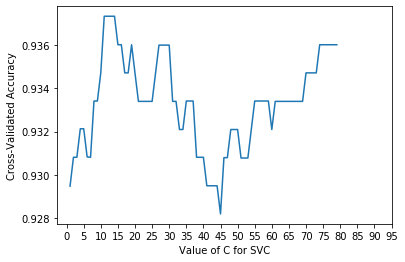

In [21]:
#커질수록 떨어진다
C_range=list(np.arange(1,80,1))
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0,100,5))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [22]:
C_range=list(np.arange(1,30,0.1))
acc_score = []
for c in tqdm(C_range):
    svc = SVC(kernel='rbf',gamma = 'scale', C=c)
    svc.fit(X_train,y_train)
    scores = cross_validate(svc, Xstan, y, cv=10, scoring='accuracy') # 점수를 리스트로 관리해줍니다.
    score = np.mean(scores['test_score']) #10개 스코어 값의 평균
    acc_score.append(score) 
print(np.max(acc_score)) #제일 좋은 결과
print(C_range[np.argmax(acc_score)]) #제일 좋은 결과가 나온 파라미터
#제일 좋은 결과: 0.937
#제일 좋은 결과가 나온 파라미터: 11

  0%|                                                                                          | 0/290 [00:00<?, ?it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  1%|▊                                                                                 | 3/290 [00:00<01:05,  4.39it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

  4%|███                                                                              | 11/290 [00:03<01:25,  3.28it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  5%|███▉                                                                             | 14/290 [00:04<01:28,  3.13it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

  8%|██████▏                                                                          | 22/290 [00:06<01:26,  3.11it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  9%|██████▉                                                                          | 25/290 [00:07<01:23,  3.18it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 11%|█████████▏                                                                       | 33/290 [00:10<01:24,  3.05it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 12%|██████████                                                                       | 36/290 [00:11<01:22,  3.09it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 15%|████████████▎                                                                    | 44/290 [00:13<01:07,  3.65it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 16%|█████████████▏                                                                   | 47/290 [00:14<01:06,  3.68it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 19%|███████████████▎                                                                 | 55/290 [00:16<01:04,  3.62it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 20%|████████████████▏                                                                | 58/290 [00:17<01:00,  3.80it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 23%|██████████████████▍                                                              | 66/290 [00:19<01:04,  3.45it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 24%|███████████████████▎                                                             | 69/290 [00:20<01:02,  3.52it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 27%|█████████████████████▌                                                           | 77/290 [00:22<00:59,  3.57it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 28%|██████████████████████▎                                                          | 80/290 [00:23<01:01,  3.40it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 30%|████████████████████████▌                                                        | 88/290 [00:25<00:52,  3.81it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 31%|█████████████████████████▍                                                       | 91/290 [00:26<00:51,  3.84it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 34%|███████████████████████████▋                                                     | 99/290 [00:28<00:49,  3.84it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 35%|████████████████████████████▏                                                   | 102/290 [00:29<00:52,  3.57it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 38%|██████████████████████████████▎                                                 | 110/290 [00:31<00:49,  3.62it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 39%|███████████████████████████████▏                                                | 113/290 [00:32<00:47,  3.70it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 42%|█████████████████████████████████▍                                              | 121/290 [00:34<00:44,  3.82it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 43%|██████████████████████████████████▏                                             | 124/290 [00:35<00:46,  3.58it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 46%|████████████████████████████████████▍                                           | 132/290 [00:37<00:43,  3.65it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 47%|█████████████████████████████████████▏                                          | 135/290 [00:38<00:41,  3.73it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 49%|███████████████████████████████████████▍                                        | 143/290 [00:40<00:39,  3.70it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 50%|████████████████████████████████████████▎                                       | 146/290 [00:41<00:39,  3.66it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 53%|██████████████████████████████████████████▍                                     | 154/290 [00:44<00:38,  3.50it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 54%|███████████████████████████████████████████▎                                    | 157/290 [00:44<00:36,  3.66it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 57%|█████████████████████████████████████████████▌                                  | 165/290 [00:46<00:32,  3.79it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 58%|██████████████████████████████████████████████▎                                 | 168/290 [00:47<00:32,  3.79it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 61%|████████████████████████████████████████████████▌                               | 176/290 [00:50<00:40,  2.82it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 62%|█████████████████████████████████████████████████▍                              | 179/290 [00:51<00:39,  2.84it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 64%|███████████████████████████████████████████████████▌                            | 187/290 [00:54<00:39,  2.62it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 66%|████████████████████████████████████████████████████▍                           | 190/290 [00:55<00:36,  2.74it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 68%|██████████████████████████████████████████████████████▌                         | 198/290 [00:58<00:37,  2.48it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 69%|███████████████████████████████████████████████████████▍                        | 201/290 [01:00<00:34,  2.55it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 72%|█████████████████████████████████████████████████████████▋                      | 209/290 [01:02<00:21,  3.68it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 73%|██████████████████████████████████████████████████████████▍                     | 212/290 [01:03<00:21,  3.66it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 76%|████████████████████████████████████████████████████████████▋                   | 220/290 [01:05<00:21,  3.32it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 77%|█████████████████████████████████████████████████████████████▌                  | 223/290 [01:06<00:20,  3.32it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 80%|███████████████████████████████████████████████████████████████▋                | 231/290 [01:08<00:17,  3.42it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 81%|████████████████████████████████████████████████████████████████▌               | 234/290 [01:09<00:15,  3.58it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 83%|██████████████████████████████████████████████████████████████████▊             | 242/290 [01:11<00:12,  3.82it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 84%|███████████████████████████████████████████████████████████████████▌            | 245/290 [01:12<00:12,  3.55it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 87%|█████████████████████████████████████████████████████████████████████▊          | 253/290 [01:14<00:10,  3.49it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 88%|██████████████████████████████████████████████████████████████████████▌         | 256/290 [01:15<00:10,  3.38it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 91%|████████████████████████████████████████████████████████████████████████▊       | 264/290 [01:17<00:07,  3.46it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 92%|█████████████████████████████████████████████████████████████████████████▋      | 267/290 [01:18<00:06,  3.64it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 95%|███████████████████████████████████████████████████████████████████████████▊    | 275/290 [01:20<00:04,  3.71it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 96%|████████████████████████████████████████████████████████████████████████████▋   | 278/290 [01:21<00:03,  3.63it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 99%|██████████████████████████████████████████████████████████████████████████████▉ | 286/290 [01:23<00:01,  3.48it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
100%|███████████████████████████████████████████████████████████████████████████████▋| 289/290 [01:24<00:00,  3.63it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

0.9373205741626794
11.000000000000009


Text(0, 0.5, 'Accuracy')

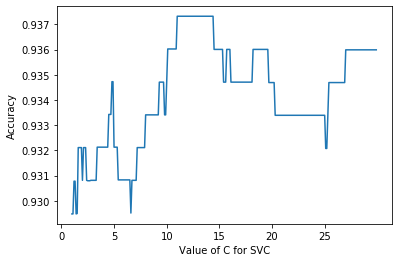

In [23]:
# 각 하이퍼 파라미터 별로 값이 얼만지 그려서 확인해보자
C_range=list(np.arange(1,30,0.1))
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0,30,5))
plt.xlabel('Value of C for SVC')
plt.ylabel('Accuracy')

In [24]:
C_range[np.argmax(acc_score)]

11.000000000000009

In [43]:
tuned_parameters = {
 'C': (np.arange(10,12,0.2)), 'kernel': ['linear'],
 'C': (np.arange(10,12,0.2)), 'gamma': (np.arange(0.1,10,0.1)), 'kernel': ['rbf']
                   }

In [44]:
from sklearn.model_selection import GridSearchCV
svm_model= SVC()
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy', verbose = 3)

In [ ]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

Fitting 10 folds for each of 990 candidates, totalling 9900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=10.0, gamma=0.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.1, kernel=rbf, score=0.919, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=10.0, gamma=0.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.1, kernel=rbf, score=0.903, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=10.0, gamma=0.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.1, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.1, kernel=rbf, score=0.918, total=   0.0s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.1, kernel=rbf, score=0.918, total=   0.0s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.1, kernel=rbf, score=0.951, total=   0.0s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.1, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.1, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.1, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.1, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.0, gamma=0.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.2, kernel=rbf, score=0.871, total=   0.0s
[CV] C=10.0, gamma=0.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.2, kernel=rbf, score=0.903, total=   0.0s
[CV] C=10.0, gamma=0.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.2, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.0, gamma=0.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.2, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.0, gamma=0.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.2, kernel=rbf, score=0.918, total=   0.0s
[CV] C=10.0, gamma=0.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.2, kernel=rbf, score=0.967, total=   0.1s
[CV] C=10.0, gamma=0.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.2, kernel=rbf, score=0.885, total=   0.1s
[CV] C=10.0, gamma=0.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.2, kernel=rbf, score=0.852, total=   0.1s
[CV] C=10.0, gamma=0.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.2, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.0, gamma=0.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.2, kernel=rbf, score=0.918, total=   0.0s
[CV] C=10.0, gamma=0.30000000000000004, kernel=rbf ...................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=0.30000000000000004, kernel=rbf, score=0.855, total=   0.0s
[CV] C=10.0, gamma=0.30000000000000004, kernel=rbf ...................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=0.30000000000000004, kernel=rbf, score=0.855, total=   0.0s
[CV] C=10.0, gamma=0.30000000000000004, kernel=rbf ...................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=0.30000000000000004, kernel=rbf, score=0.885, total=   0.1s
[CV] C=10.0, gamma=0.30000000000000004, kernel=rbf ...................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=0.30000000000000004, kernel=rbf, score=0.885, total=   0.1s
[CV] C=10.0, gamma=0.30000000000000004, kernel=rbf ...................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=0.30000000000000004, kernel=rbf, score=0.918, total=   0.1s
[CV] C=10.0, gamma=0.30000000000000004, kernel=rbf ...................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=0.30000000000000004, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.0, gamma=0.30000000000000004, kernel=rbf ...................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=0.30000000000000004, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.0, gamma=0.30000000000000004, kernel=rbf ...................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=0.30000000000000004, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.0, gamma=0.30000000000000004, kernel=rbf ...................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=0.30000000000000004, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.0, gamma=0.30000000000000004, kernel=rbf ...................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=0.30000000000000004, kernel=rbf, score=0.951, total=   0.0s
[CV] C=10.0, gamma=0.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.4, kernel=rbf, score=0.839, total=   0.0s
[CV] C=10.0, gamma=0.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.4, kernel=rbf, score=0.839, total=   0.0s
[CV] C=10.0, gamma=0.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.4, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.0, gamma=0.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.4, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.0, gamma=0.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.4, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.0, gamma=0.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.4, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.0, gamma=0.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.4, kernel=rbf, score=0.836, total=   0.0s
[CV] C=10.0, gamma=0.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.4, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.0, gamma=0.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.4, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.0, gamma=0.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.4, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.0, gamma=0.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.5, kernel=rbf, score=0.823, total=   0.0s
[CV] C=10.0, gamma=0.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.5, kernel=rbf, score=0.839, total=   0.0s
[CV] C=10.0, gamma=0.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.5, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.0, gamma=0.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.5, kernel=rbf, score=0.885, total=   0.1s
[CV] C=10.0, gamma=0.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.5, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.0, gamma=0.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.5, kernel=rbf, score=0.836, total=   0.0s
[CV] C=10.0, gamma=0.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.5, kernel=rbf, score=0.836, total=   0.0s
[CV] C=10.0, gamma=0.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.5, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.0, gamma=0.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.5, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.0, gamma=0.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.5, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.0, gamma=0.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.6, kernel=rbf, score=0.806, total=   0.0s
[CV] C=10.0, gamma=0.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.6, kernel=rbf, score=0.839, total=   0.0s
[CV] C=10.0, gamma=0.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.6, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.0, gamma=0.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.6, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.0, gamma=0.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.6, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.0, gamma=0.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.6, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.0, gamma=0.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.6, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.0, gamma=0.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.6, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.0, gamma=0.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.6, kernel=rbf, score=0.836, total=   0.0s
[CV] C=10.0, gamma=0.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.6, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.0, gamma=0.7000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=0.7000000000000001, kernel=rbf, score=0.790, total=   0.0s
[CV] C=10.0, gamma=0.7000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=0.7000000000000001, kernel=rbf, score=0.823, total=   0.0s
[CV] C=10.0, gamma=0.7000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=0.7000000000000001, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.0, gamma=0.7000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=0.7000000000000001, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.0, gamma=0.7000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=0.7000000000000001, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.0, gamma=0.7000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=0.7000000000000001, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.0, gamma=0.7000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=0.7000000000000001, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.0, gamma=0.7000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=0.7000000000000001, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10.0, gamma=0.7000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=0.7000000000000001, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.0, gamma=0.7000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=0.7000000000000001, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.0, gamma=0.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.8, kernel=rbf, score=0.758, total=   0.1s
[CV] C=10.0, gamma=0.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.8, kernel=rbf, score=0.823, total=   0.0s
[CV] C=10.0, gamma=0.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.8, kernel=rbf, score=0.836, total=   0.0s
[CV] C=10.0, gamma=0.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.8, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.0, gamma=0.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.8, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.0, gamma=0.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.8, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.0, gamma=0.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.8, kernel=rbf, score=0.770, total=   0.0s
[CV] C=10.0, gamma=0.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.8, kernel=rbf, score=0.770, total=   0.1s
[CV] C=10.0, gamma=0.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.8, kernel=rbf, score=0.787, total=   0.1s
[CV] C=10.0, gamma=0.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.8, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.0, gamma=0.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.9, kernel=rbf, score=0.758, total=   0.0s
[CV] C=10.0, gamma=0.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.9, kernel=rbf, score=0.806, total=   0.0s
[CV] C=10.0, gamma=0.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.9, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.0, gamma=0.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.9, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.0, gamma=0.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.9, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.0, gamma=0.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.9, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.0, gamma=0.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.9, kernel=rbf, score=0.754, total=   0.0s
[CV] C=10.0, gamma=0.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.9, kernel=rbf, score=0.754, total=   0.0s
[CV] C=10.0, gamma=0.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.9, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10.0, gamma=0.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=0.9, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.0, kernel=rbf, score=0.758, total=   0.0s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.0, kernel=rbf, score=0.806, total=   0.0s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.0, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.0, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.0, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.0, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.0, kernel=rbf, score=0.738, total=   0.0s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.0, kernel=rbf, score=0.738, total=   0.0s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.0, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.0, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.0, gamma=1.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.1, kernel=rbf, score=0.758, total=   0.0s
[CV] C=10.0, gamma=1.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.1, kernel=rbf, score=0.790, total=   0.0s
[CV] C=10.0, gamma=1.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.1, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.0, gamma=1.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.1, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.0, gamma=1.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.1, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.0, gamma=1.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.1, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.0, gamma=1.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.1, kernel=rbf, score=0.721, total=   0.0s
[CV] C=10.0, gamma=1.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.1, kernel=rbf, score=0.721, total=   0.0s
[CV] C=10.0, gamma=1.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.1, kernel=rbf, score=0.787, total=   0.1s
[CV] C=10.0, gamma=1.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.1, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.0, gamma=1.2000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.2000000000000002, kernel=rbf, score=0.758, total=   0.0s
[CV] C=10.0, gamma=1.2000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.2000000000000002, kernel=rbf, score=0.790, total=   0.0s
[CV] C=10.0, gamma=1.2000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.2000000000000002, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.0, gamma=1.2000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.2000000000000002, kernel=rbf, score=0.836, total=   0.0s
[CV] C=10.0, gamma=1.2000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.2000000000000002, kernel=rbf, score=0.836, total=   0.0s
[CV] C=10.0, gamma=1.2000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.2000000000000002, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.0, gamma=1.2000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.2000000000000002, kernel=rbf, score=0.721, total=   0.0s
[CV] C=10.0, gamma=1.2000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.2000000000000002, kernel=rbf, score=0.721, total=   0.0s
[CV] C=10.0, gamma=1.2000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.2000000000000002, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10.0, gamma=1.2000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.2000000000000002, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.0, gamma=1.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.3000000000000003, kernel=rbf, score=0.758, total=   0.0s
[CV] C=10.0, gamma=1.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.3000000000000003, kernel=rbf, score=0.823, total=   0.0s
[CV] C=10.0, gamma=1.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.3000000000000003, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.0, gamma=1.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.3000000000000003, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.0, gamma=1.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.3000000000000003, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.0, gamma=1.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.3000000000000003, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.0, gamma=1.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.3000000000000003, kernel=rbf, score=0.721, total=   0.0s
[CV] C=10.0, gamma=1.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.3000000000000003, kernel=rbf, score=0.721, total=   0.0s
[CV] C=10.0, gamma=1.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.3000000000000003, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10.0, gamma=1.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.3000000000000003, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.0, gamma=1.4000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.4000000000000001, kernel=rbf, score=0.758, total=   0.0s
[CV] C=10.0, gamma=1.4000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.4000000000000001, kernel=rbf, score=0.823, total=   0.0s
[CV] C=10.0, gamma=1.4000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.4000000000000001, kernel=rbf, score=0.836, total=   0.0s
[CV] C=10.0, gamma=1.4000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.4000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=1.4000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.4000000000000001, kernel=rbf, score=0.721, total=   0.0s
[CV] C=10.0, gamma=1.4000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.4000000000000001, kernel=rbf, score=0.689, total=   0.0s
[CV] C=10.0, gamma=1.4000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.4000000000000001, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10.0, gamma=1.4000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.4000000000000001, kernel=rbf, score=0.721, total=   0.0s
[CV] C=10.0, gamma=1.4000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.4000000000000001, kernel=rbf, score=0.836, total=   0.0s
[CV] C=10.0, gamma=1.4000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.4000000000000001, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.0, gamma=1.5000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.5000000000000002, kernel=rbf, score=0.758, total=   0.0s
[CV] C=10.0, gamma=1.5000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.5000000000000002, kernel=rbf, score=0.645, total=   0.0s
[CV] C=10.0, gamma=1.5000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.5000000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=1.5000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.5000000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=1.5000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.5000000000000002, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=1.5000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.5000000000000002, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=1.5000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.5000000000000002, kernel=rbf, score=0.672, total=   0.0s
[CV] C=10.0, gamma=1.5000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.5000000000000002, kernel=rbf, score=0.738, total=   0.0s
[CV] C=10.0, gamma=1.5000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.5000000000000002, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.0, gamma=1.5000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.5000000000000002, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.0, gamma=1.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.6, kernel=rbf, score=0.774, total=   0.0s
[CV] C=10.0, gamma=1.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.6, kernel=rbf, score=0.597, total=   0.0s
[CV] C=10.0, gamma=1.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.6, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=1.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.6, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=1.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.6, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=1.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.6, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=1.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.6, kernel=rbf, score=0.639, total=   0.0s
[CV] C=10.0, gamma=1.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.6, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10.0, gamma=1.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.6, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.0, gamma=1.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=1.6, kernel=rbf, score=0.639, total=   0.0s
[CV] C=10.0, gamma=1.7000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.7000000000000002, kernel=rbf, score=0.790, total=   0.0s
[CV] C=10.0, gamma=1.7000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.7000000000000002, kernel=rbf, score=0.597, total=   0.0s
[CV] C=10.0, gamma=1.7000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.7000000000000002, kernel=rbf, score=0.590, total=   0.1s
[CV] C=10.0, gamma=1.7000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.7000000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=1.7000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.7000000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=1.7000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.7000000000000002, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=1.7000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.7000000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=1.7000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.7000000000000002, kernel=rbf, score=0.738, total=   0.0s
[CV] C=10.0, gamma=1.7000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.7000000000000002, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.0, gamma=1.7000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.7000000000000002, kernel=rbf, score=0.639, total=   0.0s
[CV] C=10.0, gamma=1.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.8000000000000003, kernel=rbf, score=0.774, total=   0.0s
[CV] C=10.0, gamma=1.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.8000000000000003, kernel=rbf, score=0.597, total=   0.0s
[CV] C=10.0, gamma=1.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.8000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=1.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.8000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=1.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.8000000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=1.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.8000000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=1.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.8000000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=1.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.8000000000000003, kernel=rbf, score=0.705, total=   0.0s
[CV] C=10.0, gamma=1.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.8000000000000003, kernel=rbf, score=0.639, total=   0.0s
[CV] C=10.0, gamma=1.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.8000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=1.9000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.9000000000000001, kernel=rbf, score=0.677, total=   0.0s
[CV] C=10.0, gamma=1.9000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.9000000000000001, kernel=rbf, score=0.581, total=   0.0s
[CV] C=10.0, gamma=1.9000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.9000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=1.9000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.9000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=1.9000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.9000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=1.9000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.9000000000000001, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=1.9000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.9000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=1.9000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.9000000000000001, kernel=rbf, score=0.705, total=   0.0s
[CV] C=10.0, gamma=1.9000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.9000000000000001, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=1.9000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=1.9000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.0, kernel=rbf, score=0.677, total=   0.0s
[CV] C=10.0, gamma=2.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.0, kernel=rbf, score=0.581, total=   0.0s
[CV] C=10.0, gamma=2.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.0, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.0, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.0, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.0, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=2.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=2.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.0, kernel=rbf, score=0.705, total=   0.0s
[CV] C=10.0, gamma=2.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.0, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=2.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.0, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=2.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.1, kernel=rbf, score=0.661, total=   0.0s
[CV] C=10.0, gamma=2.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.1, kernel=rbf, score=0.565, total=   0.0s
[CV] C=10.0, gamma=2.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.1, kernel=rbf, score=0.525, total=   0.0s
[CV] C=10.0, gamma=2.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.1, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.0, gamma=2.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.1, kernel=rbf, score=0.689, total=   0.0s
[CV] C=10.0, gamma=2.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.1, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=2.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=2.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.2, kernel=rbf, score=0.661, total=   0.0s
[CV] C=10.0, gamma=2.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.2, kernel=rbf, score=0.565, total=   0.0s
[CV] C=10.0, gamma=2.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.2, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.2, kernel=rbf, score=0.590, total=   0.1s
[CV] C=10.0, gamma=2.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.2, kernel=rbf, score=0.590, total=   0.1s
[CV] C=10.0, gamma=2.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.2, kernel=rbf, score=0.525, total=   0.0s
[CV] C=10.0, gamma=2.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.2, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=2.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.2, kernel=rbf, score=0.689, total=   0.0s
[CV] C=10.0, gamma=2.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.2, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=2.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=2.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.3000000000000003, kernel=rbf, score=0.661, total=   0.0s
[CV] C=10.0, gamma=2.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.3000000000000003, kernel=rbf, score=0.565, total=   0.0s
[CV] C=10.0, gamma=2.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.3000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.3000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.3000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.3000000000000003, kernel=rbf, score=0.525, total=   0.0s
[CV] C=10.0, gamma=2.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.3000000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=2.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.3000000000000003, kernel=rbf, score=0.689, total=   0.1s
[CV] C=10.0, gamma=2.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.3000000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=2.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.3000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=2.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.4000000000000004, kernel=rbf, score=0.661, total=   0.0s
[CV] C=10.0, gamma=2.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.4000000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=2.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.4000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.4000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.4000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=2.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.4000000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=2.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.4000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=2.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.4000000000000004, kernel=rbf, score=0.672, total=   0.0s
[CV] C=10.0, gamma=2.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.4000000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=2.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.4000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=2.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.5000000000000004, kernel=rbf, score=0.661, total=   0.0s
[CV] C=10.0, gamma=2.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.5000000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=2.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.5000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.5000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.5000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=2.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.5000000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=2.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.5000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=2.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.5000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.0, gamma=2.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.5000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.5000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=2.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.6, kernel=rbf, score=0.661, total=   0.0s
[CV] C=10.0, gamma=2.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.6, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=2.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.6, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.6, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=2.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.6, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=2.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.6, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=2.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.6, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.0, gamma=2.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.6, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=2.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.7, kernel=rbf, score=0.677, total=   0.0s
[CV] C=10.0, gamma=2.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.7, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=2.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.7, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.7, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=2.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.7, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=2.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.7, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=2.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.7, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.0, gamma=2.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.7, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=2.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=2.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.8000000000000003, kernel=rbf, score=0.677, total=   0.0s
[CV] C=10.0, gamma=2.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.8000000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=2.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.8000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.8000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=2.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.8000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=2.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.8000000000000003, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.0, gamma=2.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.8000000000000003, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.0, gamma=2.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.8000000000000003, kernel=rbf, score=0.656, total=   0.1s
[CV] C=10.0, gamma=2.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.8000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.8000000000000003, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.0, gamma=2.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.9000000000000004, kernel=rbf, score=0.645, total=   0.0s
[CV] C=10.0, gamma=2.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.9000000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=2.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.9000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.9000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=2.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.9000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=2.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.9000000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=2.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.9000000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=2.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.9000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.0, gamma=2.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.9000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=2.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=2.9000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=3.0000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.0000000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=3.0000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.0000000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=3.0000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.0000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=3.0000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.0000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=3.0000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.0000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=3.0000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.0000000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=3.0000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.0000000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=3.0000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.0000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.0, gamma=3.0000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.0000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=3.0000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.0000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=3.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.1, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=3.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=3.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.1, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=3.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=3.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=3.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.1, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=3.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=3.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.1, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.0, gamma=3.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=3.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=3.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.2, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=3.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.2, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=3.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.2, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=3.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=3.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=3.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.2, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=3.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.2, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.0, gamma=3.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.2, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.0, gamma=3.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.2, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=3.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.2, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=3.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.3000000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=3.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.3000000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=3.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.3000000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=3.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.3000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=3.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.3000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=3.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.3000000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=3.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.3000000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=3.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.3000000000000003, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.0, gamma=3.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.3000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=3.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.3000000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=3.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.4000000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=3.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.4000000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=3.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.4000000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=3.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.4000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=3.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.4000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=3.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.4000000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=3.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.4000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=3.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.4000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.0, gamma=3.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.4000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=3.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.4000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=3.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.5000000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=3.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.5000000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=3.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.5000000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=3.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.5000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=3.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.5000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=3.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.5000000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=3.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.5000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=3.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.5000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.0, gamma=3.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.5000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=3.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.5000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=3.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.6, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.0, gamma=3.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.6, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=3.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.6, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=3.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=3.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=3.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.6, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=3.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.6, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=3.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.6, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.0, gamma=3.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.6, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=3.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.6, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=3.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.7, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=3.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.7, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=3.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.7, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=3.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=3.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=3.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.7, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=3.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.7, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=3.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.7, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.0, gamma=3.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.7, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=3.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=3.7, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=3.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.8000000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=3.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.8000000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=3.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.8000000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=3.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.8000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=3.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.8000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=3.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.8000000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=3.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.8000000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=3.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.8000000000000003, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.0, gamma=3.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.8000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=3.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.8000000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=3.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.9000000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=3.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.9000000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=3.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.9000000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=3.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.9000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=3.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.9000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=3.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.9000000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=3.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.9000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=3.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.9000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.0, gamma=3.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.9000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=3.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=3.9000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=4.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.0, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=4.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.0, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=4.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.0, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=4.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.0, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=4.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.0, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=4.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.0, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=4.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.0, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=4.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.0, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.0, gamma=4.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.0, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=4.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=4.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.1, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=4.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=4.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.1, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=4.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=4.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=4.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.1, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=4.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.1, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=4.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.1, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.0, gamma=4.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=4.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=4.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.2, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=4.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.2, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=4.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.2, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=4.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=4.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=4.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.2, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=4.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.2, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=4.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.2, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.0, gamma=4.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.2, kernel=rbf, score=0.590, total=   0.1s
[CV] C=10.0, gamma=4.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.2, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=4.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.3, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=4.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.3, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=4.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.3, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=4.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.3, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=4.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.3, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=4.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.3, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.0, gamma=4.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.3, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=4.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.3, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.0, gamma=4.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.3, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=4.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.3, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=4.3999999999999995, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=4.3999999999999995, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=4.3999999999999995, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=4.3999999999999995, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=4.3999999999999995, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=4.3999999999999995, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=4.3999999999999995, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=4.3999999999999995, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=4.3999999999999995, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=4.3999999999999995, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=4.3999999999999995, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=4.3999999999999995, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=4.3999999999999995, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=4.3999999999999995, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=4.3999999999999995, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=4.3999999999999995, kernel=rbf, score=0.639, total=   0.0s
[CV] C=10.0, gamma=4.3999999999999995, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=4.3999999999999995, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=4.3999999999999995, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=4.3999999999999995, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=4.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.5, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=4.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.5, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=4.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.5, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=4.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.5, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=4.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.5, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=4.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.5, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=4.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.5, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=4.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.5, kernel=rbf, score=0.639, total=   0.0s
[CV] C=10.0, gamma=4.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.5, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=4.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.5, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=4.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.6, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=4.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.6, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=4.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.6, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=4.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=4.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=4.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.6, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=4.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.6, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=4.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.6, kernel=rbf, score=0.639, total=   0.0s
[CV] C=10.0, gamma=4.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.6, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=4.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.6, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=4.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.7, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=4.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.7, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=4.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.7, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=4.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=4.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=4.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.7, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=4.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.7, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=4.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.7, kernel=rbf, score=0.639, total=   0.0s
[CV] C=10.0, gamma=4.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.7, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=4.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.7, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=4.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.8, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=4.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.8, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=4.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.8, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=4.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.8, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=4.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.8, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=4.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.8, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=4.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.8, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=4.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.8, kernel=rbf, score=0.639, total=   0.0s
[CV] C=10.0, gamma=4.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.8, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=4.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.8, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=4.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.9, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=4.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.9, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=4.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.9, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=4.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.9, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=4.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.9, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.0, gamma=4.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.9, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.0, gamma=4.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.9, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=4.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.9, kernel=rbf, score=0.639, total=   0.0s
[CV] C=10.0, gamma=4.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.9, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=4.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=4.9, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=5.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.0, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=5.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.0, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=5.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.0, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=5.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.0, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=5.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.0, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=5.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.0, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=5.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.0, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=5.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.0, kernel=rbf, score=0.639, total=   0.0s
[CV] C=10.0, gamma=5.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.0, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=5.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=5.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.1, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=5.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=5.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.1, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=5.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=5.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.1, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.0, gamma=5.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.1, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=5.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.1, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.0, gamma=5.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.1, kernel=rbf, score=0.639, total=   0.0s
[CV] C=10.0, gamma=5.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=5.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.1, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.0, gamma=5.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.2, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=5.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.2, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=5.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.2, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=5.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=5.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=5.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.2, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.0, gamma=5.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.2, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.0, gamma=5.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.2, kernel=rbf, score=0.639, total=   0.0s
[CV] C=10.0, gamma=5.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.2, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=5.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.2, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=5.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.3, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=5.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.3, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=5.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.3, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=5.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.3, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=5.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.3, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=5.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.3, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=5.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.3, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=5.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.3, kernel=rbf, score=0.639, total=   0.0s
[CV] C=10.0, gamma=5.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.3, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=5.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.3, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=5.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.4, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=5.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.4, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=5.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.4, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=5.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.4, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=5.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.4, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=5.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.4, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=5.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.4, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=5.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.4, kernel=rbf, score=0.639, total=   0.0s
[CV] C=10.0, gamma=5.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.4, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=5.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.4, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=5.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.5, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=5.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.5, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=5.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.5, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.0, gamma=5.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.5, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=5.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.5, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=5.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.5, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=5.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.5, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.0, gamma=5.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.5, kernel=rbf, score=0.639, total=   0.1s
[CV] C=10.0, gamma=5.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.5, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=5.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.5, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=5.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.6, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=5.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.6, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=5.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.6, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=5.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.6, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=5.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=5.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.6, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=5.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.6, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.0, gamma=5.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.6, kernel=rbf, score=0.639, total=   0.1s
[CV] C=10.0, gamma=5.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=5.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.6, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.0, gamma=5.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.7, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=5.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.7, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=5.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.7, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=5.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.7, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=5.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=5.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.7, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=5.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.7, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=5.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.7, kernel=rbf, score=0.639, total=   0.0s
[CV] C=10.0, gamma=5.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=5.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.7, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=5.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.8, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=5.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.8, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=5.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.8, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=5.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.8, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=5.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.8, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=5.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.8, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=5.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.8, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=5.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.8, kernel=rbf, score=0.639, total=   0.0s
[CV] C=10.0, gamma=5.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.8, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=5.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.8, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=5.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.9, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=5.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.9, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=5.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.9, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=5.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.9, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=5.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.9, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=5.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.9, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=5.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.9, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=5.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.9, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=5.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.9, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=5.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=5.9, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=6.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.0, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=6.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.0, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=6.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.0, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=6.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=6.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.0, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=6.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.0, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=6.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.0, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=6.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.0, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=6.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.0, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.0, gamma=6.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=6.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.1, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.0, gamma=6.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.1, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.0, gamma=6.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=6.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=6.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=6.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.1, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=6.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.1, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=6.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.1, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=6.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=6.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=6.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.2, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.0, gamma=6.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.2, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=6.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.2, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=6.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.2, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=6.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=6.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.2, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=6.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.2, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=6.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.2, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=6.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=6.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.2, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=6.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.3, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=6.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.3, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.0, gamma=6.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.3, kernel=rbf, score=0.590, total=   0.1s
[CV] C=10.0, gamma=6.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.3, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=6.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.3, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=6.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.3, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=6.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.3, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=6.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.3, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=6.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.3, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=6.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.3, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=6.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.4, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=6.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.4, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=6.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.4, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=6.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.4, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=6.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.4, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=6.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.4, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=6.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.4, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=6.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.4, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=6.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.4, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=6.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.4, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=6.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.5, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=6.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.5, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.0, gamma=6.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.5, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=6.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.5, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=6.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.5, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=6.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.5, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=6.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.5, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=6.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.5, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=6.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.5, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=6.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.5, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=6.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.6, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=6.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.6, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=6.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.6, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=6.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.6, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=6.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=6.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.6, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=6.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.6, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=6.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.6, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=6.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=6.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.6, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=6.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.7, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=6.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.7, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=6.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.7, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=6.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.7, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=6.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=6.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.7, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=6.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.7, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=6.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.7, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=6.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=6.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.7, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=6.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.8, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=6.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.8, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=6.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.8, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=6.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.8, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.0, gamma=6.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.8, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.0, gamma=6.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.8, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=6.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.8, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=6.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.8, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=6.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.8, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=6.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.8, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=6.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.9, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=6.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.9, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=6.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.9, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=6.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.9, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=6.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.9, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=6.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.9, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=6.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.9, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=6.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.9, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=6.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.9, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=6.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=6.9, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=7.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.0, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=7.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.0, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=7.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.0, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=7.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=7.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.0, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=7.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.0, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=7.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.0, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=7.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.0, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=7.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.0, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=7.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=7.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.1, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=7.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=7.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.1, kernel=rbf, score=0.590, total=   0.1s
[CV] C=10.0, gamma=7.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=7.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=7.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.1, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=7.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.1, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=7.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.1, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=7.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=7.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=7.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.2, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=7.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.2, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=7.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.2, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=7.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.2, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=7.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=7.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.2, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=7.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.2, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=7.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.2, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=7.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=7.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.2, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.0, gamma=7.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.3, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=7.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.3, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=7.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.3, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=7.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.3, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=7.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.3, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=7.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.3, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=7.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.3, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=7.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.3, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=7.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.3, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=7.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.3, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=7.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.4, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=7.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.4, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=7.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.4, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=7.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.4, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=7.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.4, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=7.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.4, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=7.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.4, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.0, gamma=7.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.4, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=7.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.4, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=7.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.4, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=7.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.5, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=7.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.5, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=7.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.5, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=7.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.5, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=7.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.5, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=7.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.5, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.0, gamma=7.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.5, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=7.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.5, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=7.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.5, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=7.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.5, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.0, gamma=7.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.6, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=7.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.6, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=7.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.6, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=7.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.6, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=7.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=7.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.6, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=7.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.6, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=7.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.6, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=7.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=7.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.6, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=7.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.7, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=7.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.7, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.0, gamma=7.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.7, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.0, gamma=7.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.7, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=7.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=7.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.7, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=7.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.7, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=7.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.7, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=7.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=7.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.7, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=7.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.8, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=7.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.8, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=7.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.8, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=7.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.8, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=7.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.8, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=7.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.8, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=7.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.8, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=7.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.8, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=7.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.8, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=7.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.8, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=7.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.9, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=7.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.9, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=7.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.9, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=7.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.9, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=7.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.9, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=7.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.9, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=7.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.9, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=7.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.9, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.0, gamma=7.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.9, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.0, gamma=7.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=7.9, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=8.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.0, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=8.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.0, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=8.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.0, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.0, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=8.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.0, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.0, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=8.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.0, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=8.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.0, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=8.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.0, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=8.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.1, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.0, gamma=8.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.1, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.0, gamma=8.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.1, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=8.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.1, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=8.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.1, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=8.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.1, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=8.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=8.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.2, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=8.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.2, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=8.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.2, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=8.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.2, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=8.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.2, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=8.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.2, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=8.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.2, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=8.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.3, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=8.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.3, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.0, gamma=8.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.3, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.3, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=8.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.3, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.3, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.0, gamma=8.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.3, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.0, gamma=8.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.3, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=8.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.3, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.3, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=8.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.4, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=8.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.4, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=8.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.4, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.4, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=8.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.4, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.4, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=8.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.4, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=8.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.4, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=8.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.4, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.4, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=8.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.5, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=8.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.5, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=8.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.5, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.5, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=8.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.5, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.5, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=8.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.5, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=8.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.5, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=8.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.5, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.5, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=8.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.6, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=8.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.6, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=8.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.6, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.0, gamma=8.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.6, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=8.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.6, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=8.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.6, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.0, gamma=8.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.6, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.0, gamma=8.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.6, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=8.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.7, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=8.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.7, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=8.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.7, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.0, gamma=8.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.7, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.0, gamma=8.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.7, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=8.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.7, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=8.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.7, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=8.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.7, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=8.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.8, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=8.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.8, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=8.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.8, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.8, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=8.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.8, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.0, gamma=8.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.8, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.0, gamma=8.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.8, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.0, gamma=8.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.8, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.0, gamma=8.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.8, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.8, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.0, gamma=8.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.9, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=8.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.9, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=8.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.9, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.9, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=8.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.9, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.9, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=8.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.9, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.0, gamma=8.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.9, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=8.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.9, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=8.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=8.9, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=9.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.0, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=9.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.0, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=9.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.0, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.0, gamma=9.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.0, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=9.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.0, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.0, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=9.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.0, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=9.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.0, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=9.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.0, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=9.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.1, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=9.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=9.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.1, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=9.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.1, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=9.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.1, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=9.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.1, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=9.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=9.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.2, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=9.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.2, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=9.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.2, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=9.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.2, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=9.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.2, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=9.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.2, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=9.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.2, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=9.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.3, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=9.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.3, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=9.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.3, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.3, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=9.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.3, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.0, gamma=9.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.3, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=9.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.3, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=9.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.3, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=9.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.3, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.3, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.3, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.0, gamma=9.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.4, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.0, gamma=9.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.4, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=9.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.4, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.4, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=9.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.4, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.4, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=9.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.4, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=9.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.4, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=9.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.4, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.4, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=9.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.5, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=9.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.5, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=9.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.5, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.5, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=9.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.5, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.5, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=9.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.5, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=9.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.5, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=9.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.5, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.5, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=9.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.6, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=9.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.6, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=9.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.6, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=9.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.6, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=9.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.6, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=9.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.6, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=9.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.6, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.0, gamma=9.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.6, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=9.700000000000001, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=9.700000000000001, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=9.700000000000001, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=9.700000000000001, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=9.700000000000001, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=9.700000000000001, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.0, gamma=9.700000000000001, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=9.700000000000001, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=9.700000000000001, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=9.700000000000001, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.700000000000001, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=9.700000000000001, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.0, gamma=9.700000000000001, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=9.700000000000001, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=9.700000000000001, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=9.700000000000001, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=9.700000000000001, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=9.700000000000001, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.700000000000001, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.0, gamma=9.700000000000001, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=9.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.8, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=9.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.8, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.0, gamma=9.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.8, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.8, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=9.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.8, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.0, gamma=9.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.8, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.0, gamma=9.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.8, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=9.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.8, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=9.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.8, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.8, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.0, gamma=9.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.9, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.0, gamma=9.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.9, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.0, gamma=9.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.9, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.9, kernel=rbf, score=0.525, total=   0.1s
[CV] C=10.0, gamma=9.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.9, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.9, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.0, gamma=9.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.9, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.0, gamma=9.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.9, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.0, gamma=9.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.9, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.0, gamma=9.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.0, gamma=9.9, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.2, gamma=0.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.1, kernel=rbf, score=0.919, total=   0.0s
[CV] C=10.2, gamma=0.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.1, kernel=rbf, score=0.903, total=   0.0s
[CV] C=10.2, gamma=0.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.1, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.2, gamma=0.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.1, kernel=rbf, score=0.918, total=   0.0s
[CV] C=10.2, gamma=0.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.1, kernel=rbf, score=0.918, total=   0.0s
[CV] C=10.2, gamma=0.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.1, kernel=rbf, score=0.951, total=   0.0s
[CV] C=10.2, gamma=0.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.1, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.2, gamma=0.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.1, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.2, gamma=0.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.1, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.2, gamma=0.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.1, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.2, gamma=0.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.2, kernel=rbf, score=0.871, total=   0.0s
[CV] C=10.2, gamma=0.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.2, kernel=rbf, score=0.903, total=   0.0s
[CV] C=10.2, gamma=0.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.2, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.2, gamma=0.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.2, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.2, gamma=0.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.2, kernel=rbf, score=0.918, total=   0.0s
[CV] C=10.2, gamma=0.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.2, kernel=rbf, score=0.967, total=   0.0s
[CV] C=10.2, gamma=0.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.2, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.2, gamma=0.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.2, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.2, gamma=0.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.2, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.2, gamma=0.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.2, kernel=rbf, score=0.918, total=   0.0s
[CV] C=10.2, gamma=0.30000000000000004, kernel=rbf ...................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=0.30000000000000004, kernel=rbf, score=0.855, total=   0.0s
[CV] C=10.2, gamma=0.30000000000000004, kernel=rbf ...................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=0.30000000000000004, kernel=rbf, score=0.855, total=   0.0s
[CV] C=10.2, gamma=0.30000000000000004, kernel=rbf ...................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=0.30000000000000004, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.2, gamma=0.30000000000000004, kernel=rbf ...................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=0.30000000000000004, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.2, gamma=0.30000000000000004, kernel=rbf ...................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=0.30000000000000004, kernel=rbf, score=0.918, total=   0.0s
[CV] C=10.2, gamma=0.30000000000000004, kernel=rbf ...................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=0.30000000000000004, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.2, gamma=0.30000000000000004, kernel=rbf ...................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=0.30000000000000004, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.2, gamma=0.30000000000000004, kernel=rbf ...................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=0.30000000000000004, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.2, gamma=0.30000000000000004, kernel=rbf ...................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=0.30000000000000004, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.2, gamma=0.30000000000000004, kernel=rbf ...................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=0.30000000000000004, kernel=rbf, score=0.951, total=   0.0s
[CV] C=10.2, gamma=0.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.4, kernel=rbf, score=0.839, total=   0.0s
[CV] C=10.2, gamma=0.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.4, kernel=rbf, score=0.839, total=   0.0s
[CV] C=10.2, gamma=0.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.4, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.2, gamma=0.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.4, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.2, gamma=0.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.4, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.2, gamma=0.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.4, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.2, gamma=0.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.4, kernel=rbf, score=0.836, total=   0.0s
[CV] C=10.2, gamma=0.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.4, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.2, gamma=0.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.4, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.2, gamma=0.4, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.4, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.2, gamma=0.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.5, kernel=rbf, score=0.823, total=   0.1s
[CV] C=10.2, gamma=0.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.5, kernel=rbf, score=0.839, total=   0.0s
[CV] C=10.2, gamma=0.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.5, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.2, gamma=0.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.5, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.2, gamma=0.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.5, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.2, gamma=0.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.5, kernel=rbf, score=0.836, total=   0.0s
[CV] C=10.2, gamma=0.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.5, kernel=rbf, score=0.836, total=   0.0s
[CV] C=10.2, gamma=0.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.5, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.2, gamma=0.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.5, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.2, gamma=0.5, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.5, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.2, gamma=0.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.6, kernel=rbf, score=0.806, total=   0.0s
[CV] C=10.2, gamma=0.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.6, kernel=rbf, score=0.839, total=   0.0s
[CV] C=10.2, gamma=0.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.6, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.2, gamma=0.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.6, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.2, gamma=0.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.6, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.2, gamma=0.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.6, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.2, gamma=0.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.6, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.2, gamma=0.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.6, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.2, gamma=0.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.6, kernel=rbf, score=0.836, total=   0.0s
[CV] C=10.2, gamma=0.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.6, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.2, gamma=0.7000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=0.7000000000000001, kernel=rbf, score=0.790, total=   0.0s
[CV] C=10.2, gamma=0.7000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=0.7000000000000001, kernel=rbf, score=0.823, total=   0.0s
[CV] C=10.2, gamma=0.7000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=0.7000000000000001, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.2, gamma=0.7000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=0.7000000000000001, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.2, gamma=0.7000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=0.7000000000000001, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.2, gamma=0.7000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=0.7000000000000001, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.2, gamma=0.7000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=0.7000000000000001, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.2, gamma=0.7000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=0.7000000000000001, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10.2, gamma=0.7000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=0.7000000000000001, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.2, gamma=0.7000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=0.7000000000000001, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.2, gamma=0.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.8, kernel=rbf, score=0.758, total=   0.0s
[CV] C=10.2, gamma=0.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.8, kernel=rbf, score=0.823, total=   0.0s
[CV] C=10.2, gamma=0.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.8, kernel=rbf, score=0.836, total=   0.0s
[CV] C=10.2, gamma=0.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.8, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.2, gamma=0.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.8, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.2, gamma=0.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.8, kernel=rbf, score=0.803, total=   0.1s
[CV] C=10.2, gamma=0.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.8, kernel=rbf, score=0.770, total=   0.1s
[CV] C=10.2, gamma=0.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.8, kernel=rbf, score=0.770, total=   0.0s
[CV] C=10.2, gamma=0.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.8, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10.2, gamma=0.8, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.8, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.2, gamma=0.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.9, kernel=rbf, score=0.758, total=   0.0s
[CV] C=10.2, gamma=0.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.9, kernel=rbf, score=0.806, total=   0.0s
[CV] C=10.2, gamma=0.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.9, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.2, gamma=0.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.9, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.2, gamma=0.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.9, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.2, gamma=0.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.9, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.2, gamma=0.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.9, kernel=rbf, score=0.754, total=   0.0s
[CV] C=10.2, gamma=0.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.9, kernel=rbf, score=0.754, total=   0.0s
[CV] C=10.2, gamma=0.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.9, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10.2, gamma=0.9, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=0.9, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.2, gamma=1.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.0, kernel=rbf, score=0.758, total=   0.0s
[CV] C=10.2, gamma=1.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.0, kernel=rbf, score=0.806, total=   0.0s
[CV] C=10.2, gamma=1.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.0, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.2, gamma=1.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.0, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.2, gamma=1.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.0, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.2, gamma=1.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.0, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.2, gamma=1.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.0, kernel=rbf, score=0.738, total=   0.0s
[CV] C=10.2, gamma=1.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.0, kernel=rbf, score=0.738, total=   0.0s
[CV] C=10.2, gamma=1.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.0, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10.2, gamma=1.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.0, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.2, gamma=1.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.1, kernel=rbf, score=0.758, total=   0.0s
[CV] C=10.2, gamma=1.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.1, kernel=rbf, score=0.790, total=   0.0s
[CV] C=10.2, gamma=1.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.1, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.2, gamma=1.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.1, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.2, gamma=1.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.1, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.2, gamma=1.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.1, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.2, gamma=1.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.1, kernel=rbf, score=0.721, total=   0.0s
[CV] C=10.2, gamma=1.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.1, kernel=rbf, score=0.721, total=   0.0s
[CV] C=10.2, gamma=1.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.1, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10.2, gamma=1.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.1, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.2, gamma=1.2000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.2000000000000002, kernel=rbf, score=0.758, total=   0.0s
[CV] C=10.2, gamma=1.2000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.2000000000000002, kernel=rbf, score=0.790, total=   0.0s
[CV] C=10.2, gamma=1.2000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.2000000000000002, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.2, gamma=1.2000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.2000000000000002, kernel=rbf, score=0.836, total=   0.0s
[CV] C=10.2, gamma=1.2000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.2000000000000002, kernel=rbf, score=0.836, total=   0.0s
[CV] C=10.2, gamma=1.2000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.2000000000000002, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.2, gamma=1.2000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.2000000000000002, kernel=rbf, score=0.721, total=   0.0s
[CV] C=10.2, gamma=1.2000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.2000000000000002, kernel=rbf, score=0.721, total=   0.0s
[CV] C=10.2, gamma=1.2000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.2000000000000002, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10.2, gamma=1.2000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.2000000000000002, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.2, gamma=1.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.3000000000000003, kernel=rbf, score=0.758, total=   0.0s
[CV] C=10.2, gamma=1.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.3000000000000003, kernel=rbf, score=0.823, total=   0.0s
[CV] C=10.2, gamma=1.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.3000000000000003, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.2, gamma=1.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.3000000000000003, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.2, gamma=1.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.3000000000000003, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.2, gamma=1.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.3000000000000003, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.2, gamma=1.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.3000000000000003, kernel=rbf, score=0.721, total=   0.0s
[CV] C=10.2, gamma=1.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.3000000000000003, kernel=rbf, score=0.721, total=   0.0s
[CV] C=10.2, gamma=1.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.3000000000000003, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10.2, gamma=1.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.3000000000000003, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.2, gamma=1.4000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.4000000000000001, kernel=rbf, score=0.758, total=   0.0s
[CV] C=10.2, gamma=1.4000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.4000000000000001, kernel=rbf, score=0.823, total=   0.0s
[CV] C=10.2, gamma=1.4000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.4000000000000001, kernel=rbf, score=0.836, total=   0.0s
[CV] C=10.2, gamma=1.4000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.4000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=1.4000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.4000000000000001, kernel=rbf, score=0.721, total=   0.0s
[CV] C=10.2, gamma=1.4000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.4000000000000001, kernel=rbf, score=0.689, total=   0.0s
[CV] C=10.2, gamma=1.4000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.4000000000000001, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10.2, gamma=1.4000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.4000000000000001, kernel=rbf, score=0.721, total=   0.0s
[CV] C=10.2, gamma=1.4000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.4000000000000001, kernel=rbf, score=0.836, total=   0.0s
[CV] C=10.2, gamma=1.4000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.4000000000000001, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.2, gamma=1.5000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.5000000000000002, kernel=rbf, score=0.758, total=   0.0s
[CV] C=10.2, gamma=1.5000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.5000000000000002, kernel=rbf, score=0.645, total=   0.0s
[CV] C=10.2, gamma=1.5000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.5000000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.2, gamma=1.5000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.5000000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.2, gamma=1.5000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.5000000000000002, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.2, gamma=1.5000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.5000000000000002, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.2, gamma=1.5000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.5000000000000002, kernel=rbf, score=0.672, total=   0.0s
[CV] C=10.2, gamma=1.5000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.5000000000000002, kernel=rbf, score=0.738, total=   0.0s
[CV] C=10.2, gamma=1.5000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.5000000000000002, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.2, gamma=1.5000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.5000000000000002, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.2, gamma=1.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.6, kernel=rbf, score=0.774, total=   0.0s
[CV] C=10.2, gamma=1.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.6, kernel=rbf, score=0.597, total=   0.0s
[CV] C=10.2, gamma=1.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.6, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=1.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.6, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.2, gamma=1.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.6, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.2, gamma=1.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.6, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.2, gamma=1.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.6, kernel=rbf, score=0.639, total=   0.0s
[CV] C=10.2, gamma=1.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.6, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10.2, gamma=1.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.6, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.2, gamma=1.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=1.6, kernel=rbf, score=0.639, total=   0.0s
[CV] C=10.2, gamma=1.7000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.7000000000000002, kernel=rbf, score=0.790, total=   0.0s
[CV] C=10.2, gamma=1.7000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.7000000000000002, kernel=rbf, score=0.597, total=   0.0s
[CV] C=10.2, gamma=1.7000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.7000000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=1.7000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.7000000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=1.7000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.7000000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.2, gamma=1.7000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.7000000000000002, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.2, gamma=1.7000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.7000000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.2, gamma=1.7000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.7000000000000002, kernel=rbf, score=0.738, total=   0.0s
[CV] C=10.2, gamma=1.7000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.7000000000000002, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.2, gamma=1.7000000000000002, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.7000000000000002, kernel=rbf, score=0.639, total=   0.0s
[CV] C=10.2, gamma=1.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.8000000000000003, kernel=rbf, score=0.774, total=   0.0s
[CV] C=10.2, gamma=1.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.8000000000000003, kernel=rbf, score=0.597, total=   0.0s
[CV] C=10.2, gamma=1.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.8000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.2, gamma=1.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.8000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=1.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.8000000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.2, gamma=1.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.8000000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.2, gamma=1.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.8000000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.2, gamma=1.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.8000000000000003, kernel=rbf, score=0.705, total=   0.0s
[CV] C=10.2, gamma=1.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.8000000000000003, kernel=rbf, score=0.639, total=   0.0s
[CV] C=10.2, gamma=1.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.8000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=1.9000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.9000000000000001, kernel=rbf, score=0.677, total=   0.0s
[CV] C=10.2, gamma=1.9000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.9000000000000001, kernel=rbf, score=0.581, total=   0.0s
[CV] C=10.2, gamma=1.9000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.9000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=1.9000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.9000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=1.9000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.9000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=1.9000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.9000000000000001, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.2, gamma=1.9000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.9000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=1.9000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.9000000000000001, kernel=rbf, score=0.705, total=   0.0s
[CV] C=10.2, gamma=1.9000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.9000000000000001, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.2, gamma=1.9000000000000001, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=1.9000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.0, kernel=rbf, score=0.677, total=   0.0s
[CV] C=10.2, gamma=2.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.0, kernel=rbf, score=0.581, total=   0.0s
[CV] C=10.2, gamma=2.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.0, kernel=rbf, score=0.590, total=   0.1s
[CV] C=10.2, gamma=2.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.0, kernel=rbf, score=0.590, total=   0.1s
[CV] C=10.2, gamma=2.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.0, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.0, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.2, gamma=2.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.2, gamma=2.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.0, kernel=rbf, score=0.705, total=   0.0s
[CV] C=10.2, gamma=2.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.0, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.2, gamma=2.0, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.0, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.2, gamma=2.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.1, kernel=rbf, score=0.661, total=   0.0s
[CV] C=10.2, gamma=2.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.1, kernel=rbf, score=0.565, total=   0.0s
[CV] C=10.2, gamma=2.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.1, kernel=rbf, score=0.525, total=   0.0s
[CV] C=10.2, gamma=2.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.2, gamma=2.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.1, kernel=rbf, score=0.689, total=   0.0s
[CV] C=10.2, gamma=2.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.1, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.2, gamma=2.1, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.2, gamma=2.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.2, kernel=rbf, score=0.661, total=   0.0s
[CV] C=10.2, gamma=2.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.2, kernel=rbf, score=0.565, total=   0.0s
[CV] C=10.2, gamma=2.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.2, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.2, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.2, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.2, kernel=rbf, score=0.525, total=   0.0s
[CV] C=10.2, gamma=2.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.2, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.2, gamma=2.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.2, kernel=rbf, score=0.689, total=   0.0s
[CV] C=10.2, gamma=2.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.2, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.2, gamma=2.2, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.2, gamma=2.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.3000000000000003, kernel=rbf, score=0.661, total=   0.0s
[CV] C=10.2, gamma=2.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.3000000000000003, kernel=rbf, score=0.565, total=   0.0s
[CV] C=10.2, gamma=2.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.3000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.3000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.3000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.3000000000000003, kernel=rbf, score=0.525, total=   0.0s
[CV] C=10.2, gamma=2.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.3000000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.2, gamma=2.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.3000000000000003, kernel=rbf, score=0.689, total=   0.0s
[CV] C=10.2, gamma=2.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.3000000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.2, gamma=2.3000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.3000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.2, gamma=2.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.4000000000000004, kernel=rbf, score=0.661, total=   0.0s
[CV] C=10.2, gamma=2.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.4000000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.2, gamma=2.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.4000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.4000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.4000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.2, gamma=2.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.4000000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.2, gamma=2.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.4000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.2, gamma=2.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.4000000000000004, kernel=rbf, score=0.672, total=   0.0s
[CV] C=10.2, gamma=2.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.4000000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=10.2, gamma=2.4000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.4000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.2, gamma=2.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.5000000000000004, kernel=rbf, score=0.661, total=   0.0s
[CV] C=10.2, gamma=2.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.5000000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.2, gamma=2.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.5000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.5000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.5000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.2, gamma=2.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.5000000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.2, gamma=2.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.5000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.2, gamma=2.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.5000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.2, gamma=2.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.5000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.5000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.5000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.2, gamma=2.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.6, kernel=rbf, score=0.661, total=   0.0s
[CV] C=10.2, gamma=2.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.6, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.2, gamma=2.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.6, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.6, kernel=rbf, score=0.590, total=   0.1s
[CV] C=10.2, gamma=2.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.2, gamma=2.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.6, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.2, gamma=2.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.6, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.2, gamma=2.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.6, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.2, gamma=2.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.6, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.6, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.2, gamma=2.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.7, kernel=rbf, score=0.677, total=   0.0s
[CV] C=10.2, gamma=2.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.7, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.2, gamma=2.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.7, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.7, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.2, gamma=2.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.7, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.2, gamma=2.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.7, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.2, gamma=2.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.7, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.2, gamma=2.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.7, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.7, kernel=rbf ...................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10.2, gamma=2.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.2, gamma=2.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.8000000000000003, kernel=rbf, score=0.677, total=   0.0s
[CV] C=10.2, gamma=2.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.8000000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.2, gamma=2.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.8000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.8000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.2, gamma=2.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.8000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.2, gamma=2.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.8000000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.2, gamma=2.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.8000000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.2, gamma=2.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.8000000000000003, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.2, gamma=2.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.8000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.8000000000000003, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.8000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.2, gamma=2.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.9000000000000004, kernel=rbf, score=0.645, total=   0.0s
[CV] C=10.2, gamma=2.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.9000000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.2, gamma=2.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.9000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.9000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.2, gamma=2.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.9000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.2, gamma=2.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.9000000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.2, gamma=2.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.9000000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.2, gamma=2.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.9000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.2, gamma=2.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.9000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=2.9000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=2.9000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.2, gamma=3.0000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=3.0000000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.2, gamma=3.0000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=3.0000000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.2, gamma=3.0000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=3.0000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=3.0000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=3.0000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.2, gamma=3.0000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=3.0000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.2, gamma=3.0000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=3.0000000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.2, gamma=3.0000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=3.0000000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.2, gamma=3.0000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=3.0000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10.2, gamma=3.0000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=3.0000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.2, gamma=3.0000000000000004, kernel=rbf ....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.2, gamma=3.0000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.2, gamma=3.1, kernel=rbf ...................................[CV]  C=10.799999999999997, gamma=5.7, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=5.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.7, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.799999999999997, gamma=5.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.7, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=5.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.7, kernel=rbf, score=0.639, total=   0.0s
[CV] C=10.799999999999997, gamma=5.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.7, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=5.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.7, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=5.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.8, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.799999999999997, gamma=5.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.8, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=5.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.8, kernel=rbf, score=0.590, total=   0.1s
[CV] C=10.799999999999997, gamma=5.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.8, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=5.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.8, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=5.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.8, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.799999999999997, gamma=5.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.8, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=5.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.8, kernel=rbf, score=0.639, total=   0.1s
[CV] C=10.799999999999997, gamma=5.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.8, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=5.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.8, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=5.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.9, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.799999999999997, gamma=5.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.9, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=5.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.9, kernel=rbf, score=0.590, total=   0.1s
[CV] C=10.799999999999997, gamma=5.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.9, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=5.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.9, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=5.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.9, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.799999999999997, gamma=5.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.9, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=5.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.9, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.799999999999997, gamma=5.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.9, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=5.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=5.9, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=6.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.0, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.799999999999997, gamma=6.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.0, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.799999999999997, gamma=6.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.0, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.799999999999997, gamma=6.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=6.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.0, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=6.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.0, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.799999999999997, gamma=6.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.0, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=6.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.0, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.799999999999997, gamma=6.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.0, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=6.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=6.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.1, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.799999999999997, gamma=6.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.1, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=6.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.1, kernel=rbf, score=0.590, total=   0.1s
[CV] C=10.799999999999997, gamma=6.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=6.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=6.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.1, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.799999999999997, gamma=6.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.1, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=6.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.1, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.799999999999997, gamma=6.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=6.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=6.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.2, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=6.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.2, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.799999999999997, gamma=6.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.2, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.799999999999997, gamma=6.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.2, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=6.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=6.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.2, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.799999999999997, gamma=6.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.2, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=6.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.2, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.799999999999997, gamma=6.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.2, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=6.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.2, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=6.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.3, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=6.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.3, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=6.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.3, kernel=rbf, score=0.590, total=   0.1s
[CV] C=10.799999999999997, gamma=6.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.3, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=6.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.3, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=6.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.3, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.799999999999997, gamma=6.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.3, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=6.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.3, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.799999999999997, gamma=6.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.3, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=6.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.3, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=6.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.4, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=6.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.4, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=6.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.4, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.799999999999997, gamma=6.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.4, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=6.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.4, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=6.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.4, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.799999999999997, gamma=6.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.4, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=6.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.4, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.799999999999997, gamma=6.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.4, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=6.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.4, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=6.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.5, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=6.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.5, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.799999999999997, gamma=6.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.5, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.799999999999997, gamma=6.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.5, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=6.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.5, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=6.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.5, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.799999999999997, gamma=6.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.5, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=6.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.5, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.799999999999997, gamma=6.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.5, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=6.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.5, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=6.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.6, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.799999999999997, gamma=6.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.6, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=6.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.6, kernel=rbf, score=0.590, total=   0.1s
[CV] C=10.799999999999997, gamma=6.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.6, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=6.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=6.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.6, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.799999999999997, gamma=6.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.6, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=6.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.6, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.799999999999997, gamma=6.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=6.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.6, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=6.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.7, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.799999999999997, gamma=6.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.7, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.799999999999997, gamma=6.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.7, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.799999999999997, gamma=6.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.7, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=6.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.7, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=6.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.7, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.799999999999997, gamma=6.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.7, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=6.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.7, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.799999999999997, gamma=6.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=6.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.7, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=6.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.8, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.799999999999997, gamma=6.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.8, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=6.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.8, kernel=rbf, score=0.590, total=   0.1s
[CV] C=10.799999999999997, gamma=6.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.8, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=6.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.8, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=6.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.8, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.799999999999997, gamma=6.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.8, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=6.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.8, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.799999999999997, gamma=6.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.8, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=6.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.8, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=6.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.9, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.799999999999997, gamma=6.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.9, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.799999999999997, gamma=6.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.9, kernel=rbf, score=0.590, total=   0.1s
[CV] C=10.799999999999997, gamma=6.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.9, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=6.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.9, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=6.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.9, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.799999999999997, gamma=6.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.9, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=6.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.9, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.799999999999997, gamma=6.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.9, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=6.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=6.9, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=7.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.0, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=7.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.0, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=7.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.0, kernel=rbf, score=0.590, total=   0.1s
[CV] C=10.799999999999997, gamma=7.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=7.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.0, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=7.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.0, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.799999999999997, gamma=7.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.0, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=7.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.0, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.799999999999997, gamma=7.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.0, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=7.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=7.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.1, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=7.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.1, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=7.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.1, kernel=rbf, score=0.590, total=   0.1s
[CV] C=10.799999999999997, gamma=7.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.1, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=7.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.1, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=7.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.1, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.799999999999997, gamma=7.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.1, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=7.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.1, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.799999999999997, gamma=7.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.1, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=7.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.1, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=7.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.2, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.799999999999997, gamma=7.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.2, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=7.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.2, kernel=rbf, score=0.590, total=   0.1s
[CV] C=10.799999999999997, gamma=7.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.2, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=7.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.2, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=7.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.2, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.799999999999997, gamma=7.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.2, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=7.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.2, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.799999999999997, gamma=7.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.2, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=7.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.2, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=7.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.3, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=7.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.3, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=7.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.3, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.799999999999997, gamma=7.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.3, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=7.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.3, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=7.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.3, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.799999999999997, gamma=7.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.3, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=7.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.3, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.799999999999997, gamma=7.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.3, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=7.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.3, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=7.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.4, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.799999999999997, gamma=7.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.4, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.799999999999997, gamma=7.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.4, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.799999999999997, gamma=7.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.4, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=7.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.4, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=7.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.4, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.799999999999997, gamma=7.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.4, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=7.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.4, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.799999999999997, gamma=7.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.4, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=7.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.4, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=7.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.5, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.799999999999997, gamma=7.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.5, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.799999999999997, gamma=7.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.5, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.799999999999997, gamma=7.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.5, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=7.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.5, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=7.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.5, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.799999999999997, gamma=7.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.5, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=7.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.5, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.799999999999997, gamma=7.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.5, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=7.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.5, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=7.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.6, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.799999999999997, gamma=7.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.6, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=7.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.6, kernel=rbf, score=0.590, total=   0.1s
[CV] C=10.799999999999997, gamma=7.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.6, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=7.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=7.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.6, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.799999999999997, gamma=7.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.6, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=7.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.6, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.799999999999997, gamma=7.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=7.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.6, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=7.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.7, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=7.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.7, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=7.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.7, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10.799999999999997, gamma=7.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.7, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=7.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=7.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.7, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.799999999999997, gamma=7.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.7, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=7.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.7, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.799999999999997, gamma=7.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=7.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.7, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=7.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.8, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=7.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.8, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=7.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.8, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=7.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.8, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=7.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.8, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=7.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.8, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.799999999999997, gamma=7.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.8, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=7.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.8, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.799999999999997, gamma=7.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.8, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=7.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.8, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=7.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.9, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=7.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.9, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=7.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.9, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=7.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.9, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=7.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.9, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=7.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.9, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.799999999999997, gamma=7.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.9, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=7.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.9, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.799999999999997, gamma=7.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.9, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=7.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=7.9, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=8.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.0, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=8.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.0, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=8.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.0, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=8.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.0, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=8.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.0, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=8.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.0, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.799999999999997, gamma=8.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.0, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=8.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.0, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.799999999999997, gamma=8.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.0, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=8.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=8.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.1, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=8.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.799999999999997, gamma=8.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.1, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=8.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.1, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=8.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.1, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=8.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.1, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.799999999999997, gamma=8.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.1, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=8.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.1, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.799999999999997, gamma=8.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.1, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=8.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=8.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.2, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=8.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.2, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.799999999999997, gamma=8.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=8.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.2, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=8.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=8.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.2, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.799999999999997, gamma=8.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.2, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=8.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.2, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.799999999999997, gamma=8.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.2, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=8.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.2, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=8.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.3, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=8.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.3, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.799999999999997, gamma=8.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.3, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=8.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.3, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=8.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.3, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=8.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.3, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.799999999999997, gamma=8.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.3, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=8.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.3, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.799999999999997, gamma=8.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.3, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=8.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.3, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=8.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.4, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=8.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.4, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=8.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.4, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=8.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.4, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=8.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.4, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=8.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.4, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.799999999999997, gamma=8.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.4, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=8.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.4, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.799999999999997, gamma=8.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.4, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=8.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.4, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=8.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.5, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.799999999999997, gamma=8.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.5, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.799999999999997, gamma=8.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.5, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=8.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.5, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=8.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.5, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=8.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.5, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.799999999999997, gamma=8.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.5, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=8.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.5, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.799999999999997, gamma=8.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.5, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=8.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.5, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=8.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.6, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=8.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.6, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.799999999999997, gamma=8.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.6, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=8.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.6, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=8.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=8.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.6, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.799999999999997, gamma=8.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.6, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=8.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.6, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.799999999999997, gamma=8.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.6, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=8.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.6, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=8.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.7, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.799999999999997, gamma=8.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.7, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=8.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.7, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=8.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.7, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=8.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=8.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.7, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.799999999999997, gamma=8.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.7, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=8.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.7, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.799999999999997, gamma=8.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.7, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=8.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.7, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=8.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.8, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.799999999999997, gamma=8.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.8, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=8.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.8, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=8.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.8, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=8.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.8, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=8.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.8, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.799999999999997, gamma=8.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.8, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=8.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.8, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.799999999999997, gamma=8.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.8, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=8.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.8, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=8.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.9, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.799999999999997, gamma=8.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.9, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=8.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.9, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=8.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.9, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=8.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.9, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=8.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.9, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.799999999999997, gamma=8.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.9, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=8.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.9, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.799999999999997, gamma=8.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.9, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=8.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=8.9, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=9.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.0, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.799999999999997, gamma=9.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.0, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=9.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.0, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=9.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.0, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=9.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.0, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=9.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.0, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.799999999999997, gamma=9.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.0, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=9.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.0, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.799999999999997, gamma=9.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.0, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=9.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=9.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.1, kernel=rbf, score=0.629, total=   0.1s
[CV] C=10.799999999999997, gamma=9.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.1, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=9.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.1, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=9.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.1, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=9.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=9.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.1, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.799999999999997, gamma=9.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.1, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=9.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.1, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.799999999999997, gamma=9.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.1, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=9.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=9.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.2, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=9.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.2, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=9.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.2, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=9.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.2, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=9.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.2, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=9.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.2, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.799999999999997, gamma=9.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.2, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=9.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.2, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.799999999999997, gamma=9.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.2, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=9.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.2, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=9.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.3, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=9.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.3, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.799999999999997, gamma=9.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.3, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=9.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.3, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=9.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.3, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=9.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.3, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.799999999999997, gamma=9.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.3, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=9.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.3, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.799999999999997, gamma=9.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.3, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=9.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.3, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=9.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.4, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=9.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.4, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.799999999999997, gamma=9.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.4, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=9.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.4, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=9.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.4, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=9.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.4, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.799999999999997, gamma=9.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.4, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=9.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.4, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.799999999999997, gamma=9.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.4, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=9.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.4, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=9.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.5, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=9.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.5, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=9.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.5, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=9.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.5, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=9.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.5, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=9.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.5, kernel=rbf, score=0.508, total=   0.1s
[CV] C=10.799999999999997, gamma=9.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.5, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=9.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.5, kernel=rbf, score=0.623, total=   0.1s
[CV] C=10.799999999999997, gamma=9.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.5, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=9.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.5, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=9.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.6, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=9.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.6, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.799999999999997, gamma=9.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=9.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.6, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=9.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.6, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=9.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.6, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.799999999999997, gamma=9.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.6, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=9.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.6, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.799999999999997, gamma=9.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=9.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.6, kernel=rbf, score=0.557, total=   0.1s
[CV] C=10.799999999999997, gamma=9.700000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.700000000000001, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=9.700000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.700000000000001, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.799999999999997, gamma=9.700000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.700000000000001, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=9.700000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.700000000000001, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=9.700000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.700000000000001, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=9.700000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.700000000000001, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.799999999999997, gamma=9.700000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.700000000000001, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=9.700000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.700000000000001, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.799999999999997, gamma=9.700000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.700000000000001, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=9.700000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.700000000000001, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=9.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.8, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=9.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.8, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10.799999999999997, gamma=9.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.8, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=9.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.8, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10.799999999999997, gamma=9.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.8, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=9.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.8, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.799999999999997, gamma=9.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.8, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=9.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.8, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.799999999999997, gamma=9.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.8, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=9.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.8, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.799999999999997, gamma=9.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.9, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10.799999999999997, gamma=9.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.9, kernel=rbf, score=0.548, total=   0.1s
[CV] C=10.799999999999997, gamma=9.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.9, kernel=rbf, score=0.574, total=   0.1s
[CV] C=10.799999999999997, gamma=9.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.9, kernel=rbf, score=0.525, total=   0.1s
[CV] C=10.799999999999997, gamma=9.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.9, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=9.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.9, kernel=rbf, score=0.508, total=   0.0s
[CV] C=10.799999999999997, gamma=9.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.9, kernel=rbf, score=0.541, total=   0.0s
[CV] C=10.799999999999997, gamma=9.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.9, kernel=rbf, score=0.623, total=   0.0s
[CV] C=10.799999999999997, gamma=9.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.9, kernel=rbf, score=0.574, total=   0.0s
[CV] C=10.799999999999997, gamma=9.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.799999999999997, gamma=9.9, kernel=rbf, score=0.557, total=   0.0s
[CV] C=10.999999999999996, gamma=0.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.1, kernel=rbf, score=0.919, total=   0.0s
[CV] C=10.999999999999996, gamma=0.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.1, kernel=rbf, score=0.887, total=   0.0s
[CV] C=10.999999999999996, gamma=0.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.1, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.999999999999996, gamma=0.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.1, kernel=rbf, score=0.918, total=   0.0s
[CV] C=10.999999999999996, gamma=0.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.1, kernel=rbf, score=0.918, total=   0.0s
[CV] C=10.999999999999996, gamma=0.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.1, kernel=rbf, score=0.951, total=   0.0s
[CV] C=10.999999999999996, gamma=0.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.1, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.999999999999996, gamma=0.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.1, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.999999999999996, gamma=0.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.1, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.999999999999996, gamma=0.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.1, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.999999999999996, gamma=0.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.2, kernel=rbf, score=0.871, total=   0.0s
[CV] C=10.999999999999996, gamma=0.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.2, kernel=rbf, score=0.903, total=   0.0s
[CV] C=10.999999999999996, gamma=0.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.2, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.999999999999996, gamma=0.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.2, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.999999999999996, gamma=0.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.2, kernel=rbf, score=0.918, total=   0.0s
[CV] C=10.999999999999996, gamma=0.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.2, kernel=rbf, score=0.967, total=   0.0s
[CV] C=10.999999999999996, gamma=0.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.2, kernel=rbf, score=0.885, total=   0.1s
[CV] C=10.999999999999996, gamma=0.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.2, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.999999999999996, gamma=0.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.2, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.999999999999996, gamma=0.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.2, kernel=rbf, score=0.918, total=   0.0s
[CV] C=10.999999999999996, gamma=0.30000000000000004, kernel=rbf .....


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.30000000000000004, kernel=rbf, score=0.855, total=   0.0s
[CV] C=10.999999999999996, gamma=0.30000000000000004, kernel=rbf .....


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.30000000000000004, kernel=rbf, score=0.855, total=   0.0s
[CV] C=10.999999999999996, gamma=0.30000000000000004, kernel=rbf .....


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.30000000000000004, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.999999999999996, gamma=0.30000000000000004, kernel=rbf .....


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.30000000000000004, kernel=rbf, score=0.885, total=   0.1s
[CV] C=10.999999999999996, gamma=0.30000000000000004, kernel=rbf .....


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.30000000000000004, kernel=rbf, score=0.918, total=   0.0s
[CV] C=10.999999999999996, gamma=0.30000000000000004, kernel=rbf .....


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.30000000000000004, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.999999999999996, gamma=0.30000000000000004, kernel=rbf .....


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.30000000000000004, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.999999999999996, gamma=0.30000000000000004, kernel=rbf .....


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.30000000000000004, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.999999999999996, gamma=0.30000000000000004, kernel=rbf .....


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.30000000000000004, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.999999999999996, gamma=0.30000000000000004, kernel=rbf .....


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.30000000000000004, kernel=rbf, score=0.951, total=   0.0s
[CV] C=10.999999999999996, gamma=0.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.4, kernel=rbf, score=0.839, total=   0.1s
[CV] C=10.999999999999996, gamma=0.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.4, kernel=rbf, score=0.839, total=   0.0s
[CV] C=10.999999999999996, gamma=0.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.4, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.999999999999996, gamma=0.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.4, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.999999999999996, gamma=0.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.4, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.999999999999996, gamma=0.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.4, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.999999999999996, gamma=0.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.4, kernel=rbf, score=0.836, total=   0.0s
[CV] C=10.999999999999996, gamma=0.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.4, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.999999999999996, gamma=0.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.4, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.999999999999996, gamma=0.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.4, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.999999999999996, gamma=0.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.5, kernel=rbf, score=0.823, total=   0.0s
[CV] C=10.999999999999996, gamma=0.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.5, kernel=rbf, score=0.839, total=   0.0s
[CV] C=10.999999999999996, gamma=0.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.5, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.999999999999996, gamma=0.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.5, kernel=rbf, score=0.885, total=   0.0s
[CV] C=10.999999999999996, gamma=0.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.5, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.999999999999996, gamma=0.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.5, kernel=rbf, score=0.836, total=   0.1s
[CV] C=10.999999999999996, gamma=0.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.5, kernel=rbf, score=0.836, total=   0.0s
[CV] C=10.999999999999996, gamma=0.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.5, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.999999999999996, gamma=0.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.5, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.999999999999996, gamma=0.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.5, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10.999999999999996, gamma=0.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.6, kernel=rbf, score=0.806, total=   0.0s
[CV] C=10.999999999999996, gamma=0.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.6, kernel=rbf, score=0.839, total=   0.1s
[CV] C=10.999999999999996, gamma=0.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.6, kernel=rbf, score=0.852, total=   0.1s
[CV] C=10.999999999999996, gamma=0.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.6, kernel=rbf, score=0.869, total=   0.1s
[CV] C=10.999999999999996, gamma=0.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.6, kernel=rbf, score=0.852, total=   0.1s
[CV] C=10.999999999999996, gamma=0.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.6, kernel=rbf, score=0.803, total=   0.1s
[CV] C=10.999999999999996, gamma=0.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.6, kernel=rbf, score=0.820, total=   0.1s
[CV] C=10.999999999999996, gamma=0.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.6, kernel=rbf, score=0.803, total=   0.1s
[CV] C=10.999999999999996, gamma=0.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.6, kernel=rbf, score=0.836, total=   0.1s
[CV] C=10.999999999999996, gamma=0.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.6, kernel=rbf, score=0.902, total=   0.1s
[CV] C=10.999999999999996, gamma=0.7000000000000001, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.7000000000000001, kernel=rbf, score=0.790, total=   0.1s
[CV] C=10.999999999999996, gamma=0.7000000000000001, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.7000000000000001, kernel=rbf, score=0.823, total=   0.1s
[CV] C=10.999999999999996, gamma=0.7000000000000001, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.7000000000000001, kernel=rbf, score=0.852, total=   0.1s
[CV] C=10.999999999999996, gamma=0.7000000000000001, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.7000000000000001, kernel=rbf, score=0.820, total=   0.1s
[CV] C=10.999999999999996, gamma=0.7000000000000001, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.7000000000000001, kernel=rbf, score=0.852, total=   0.0s
[CV] C=10.999999999999996, gamma=0.7000000000000001, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.7000000000000001, kernel=rbf, score=0.803, total=   0.1s
[CV] C=10.999999999999996, gamma=0.7000000000000001, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.7000000000000001, kernel=rbf, score=0.803, total=   0.1s
[CV] C=10.999999999999996, gamma=0.7000000000000001, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.7000000000000001, kernel=rbf, score=0.787, total=   0.1s
[CV] C=10.999999999999996, gamma=0.7000000000000001, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.7000000000000001, kernel=rbf, score=0.803, total=   0.1s
[CV] C=10.999999999999996, gamma=0.7000000000000001, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.7000000000000001, kernel=rbf, score=0.869, total=   0.1s
[CV] C=10.999999999999996, gamma=0.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.8, kernel=rbf, score=0.758, total=   0.1s
[CV] C=10.999999999999996, gamma=0.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.8, kernel=rbf, score=0.823, total=   0.1s
[CV] C=10.999999999999996, gamma=0.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.8, kernel=rbf, score=0.836, total=   0.1s
[CV] C=10.999999999999996, gamma=0.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.8, kernel=rbf, score=0.820, total=   0.1s
[CV] C=10.999999999999996, gamma=0.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.8, kernel=rbf, score=0.852, total=   0.1s
[CV] C=10.999999999999996, gamma=0.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.8, kernel=rbf, score=0.803, total=   0.1s
[CV] C=10.999999999999996, gamma=0.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.8, kernel=rbf, score=0.770, total=   0.1s
[CV] C=10.999999999999996, gamma=0.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.8, kernel=rbf, score=0.770, total=   0.1s
[CV] C=10.999999999999996, gamma=0.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.8, kernel=rbf, score=0.787, total=   0.1s
[CV] C=10.999999999999996, gamma=0.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.8, kernel=rbf, score=0.869, total=   0.1s
[CV] C=10.999999999999996, gamma=0.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.9, kernel=rbf, score=0.758, total=   0.1s
[CV] C=10.999999999999996, gamma=0.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.9, kernel=rbf, score=0.806, total=   0.1s
[CV] C=10.999999999999996, gamma=0.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.9, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.999999999999996, gamma=0.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.9, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.999999999999996, gamma=0.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.9, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.999999999999996, gamma=0.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.9, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.999999999999996, gamma=0.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.9, kernel=rbf, score=0.754, total=   0.0s
[CV] C=10.999999999999996, gamma=0.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.9, kernel=rbf, score=0.754, total=   0.0s
[CV] C=10.999999999999996, gamma=0.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.9, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10.999999999999996, gamma=0.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=0.9, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.999999999999996, gamma=1.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=1.0, kernel=rbf, score=0.758, total=   0.0s
[CV] C=10.999999999999996, gamma=1.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=1.0, kernel=rbf, score=0.806, total=   0.1s
[CV] C=10.999999999999996, gamma=1.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=1.0, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.999999999999996, gamma=1.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=1.0, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.999999999999996, gamma=1.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=1.0, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.999999999999996, gamma=1.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=1.0, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.999999999999996, gamma=1.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=1.0, kernel=rbf, score=0.738, total=   0.0s
[CV] C=10.999999999999996, gamma=1.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=1.0, kernel=rbf, score=0.738, total=   0.0s
[CV] C=10.999999999999996, gamma=1.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=1.0, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10.999999999999996, gamma=1.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=1.0, kernel=rbf, score=0.869, total=   0.0s
[CV] C=10.999999999999996, gamma=1.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=1.1, kernel=rbf, score=0.758, total=   0.0s
[CV] C=10.999999999999996, gamma=1.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=1.1, kernel=rbf, score=0.790, total=   0.0s
[CV] C=10.999999999999996, gamma=1.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=1.1, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.999999999999996, gamma=1.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=1.1, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.999999999999996, gamma=1.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=1.1, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10.999999999999996, gamma=1.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=1.1, kernel=rbf, score=0.803, total=   0.0s
[CV] C=10.999999999999996, gamma=1.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=1.1, kernel=rbf, score=0.721, total=   0.0s
[CV] C=10.999999999999996, gamma=1.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=1.1, kernel=rbf, score=0.721, total=   0.0s
[CV] C=10.999999999999996, gamma=1.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10.999999999999996, gamma=1.1, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10.999999999999996, gamma=1.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.6, kernel=rbf, score=0.597, total=   0.0s
[CV] C=11.799999999999994, gamma=1.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.6, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=1.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.6, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=1.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.6, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=1.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.6, kernel=rbf, score=0.541, total=   0.0s
[CV] C=11.799999999999994, gamma=1.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.6, kernel=rbf, score=0.639, total=   0.0s
[CV] C=11.799999999999994, gamma=1.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.6, kernel=rbf, score=0.787, total=   0.0s
[CV] C=11.799999999999994, gamma=1.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.6, kernel=rbf, score=0.656, total=   0.0s
[CV] C=11.799999999999994, gamma=1.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.6, kernel=rbf, score=0.639, total=   0.0s
[CV] C=11.799999999999994, gamma=1.7000000000000002, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.7000000000000002, kernel=rbf, score=0.790, total=   0.0s
[CV] C=11.799999999999994, gamma=1.7000000000000002, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.7000000000000002, kernel=rbf, score=0.597, total=   0.0s
[CV] C=11.799999999999994, gamma=1.7000000000000002, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.7000000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=1.7000000000000002, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.7000000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=1.7000000000000002, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.7000000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=1.7000000000000002, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.7000000000000002, kernel=rbf, score=0.541, total=   0.0s
[CV] C=11.799999999999994, gamma=1.7000000000000002, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.7000000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=1.7000000000000002, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.7000000000000002, kernel=rbf, score=0.738, total=   0.0s
[CV] C=11.799999999999994, gamma=1.7000000000000002, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.7000000000000002, kernel=rbf, score=0.656, total=   0.0s
[CV] C=11.799999999999994, gamma=1.7000000000000002, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.7000000000000002, kernel=rbf, score=0.639, total=   0.0s
[CV] C=11.799999999999994, gamma=1.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.8000000000000003, kernel=rbf, score=0.774, total=   0.0s
[CV] C=11.799999999999994, gamma=1.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.8000000000000003, kernel=rbf, score=0.597, total=   0.0s
[CV] C=11.799999999999994, gamma=1.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.8000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=1.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.8000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=1.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.8000000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=1.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.8000000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=11.799999999999994, gamma=1.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.8000000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=1.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.8000000000000003, kernel=rbf, score=0.705, total=   0.0s
[CV] C=11.799999999999994, gamma=1.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.8000000000000003, kernel=rbf, score=0.639, total=   0.0s
[CV] C=11.799999999999994, gamma=1.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.8000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=1.9000000000000001, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.9000000000000001, kernel=rbf, score=0.677, total=   0.0s
[CV] C=11.799999999999994, gamma=1.9000000000000001, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.9000000000000001, kernel=rbf, score=0.581, total=   0.0s
[CV] C=11.799999999999994, gamma=1.9000000000000001, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.9000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=1.9000000000000001, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.9000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=1.9000000000000001, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.9000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=1.9000000000000001, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.9000000000000001, kernel=rbf, score=0.541, total=   0.1s
[CV] C=11.799999999999994, gamma=1.9000000000000001, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.9000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=1.9000000000000001, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.9000000000000001, kernel=rbf, score=0.705, total=   0.1s
[CV] C=11.799999999999994, gamma=1.9000000000000001, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.9000000000000001, kernel=rbf, score=0.623, total=   0.0s
[CV] C=11.799999999999994, gamma=1.9000000000000001, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=1.9000000000000001, kernel=rbf, score=0.590, total=   0.1s
[CV] C=11.799999999999994, gamma=2.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.0, kernel=rbf, score=0.677, total=   0.1s
[CV] C=11.799999999999994, gamma=2.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.0, kernel=rbf, score=0.581, total=   0.1s
[CV] C=11.799999999999994, gamma=2.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.0, kernel=rbf, score=0.590, total=   0.1s
[CV] C=11.799999999999994, gamma=2.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.0, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.0, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.0, kernel=rbf, score=0.541, total=   0.0s
[CV] C=11.799999999999994, gamma=2.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=2.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.0, kernel=rbf, score=0.705, total=   0.0s
[CV] C=11.799999999999994, gamma=2.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.0, kernel=rbf, score=0.623, total=   0.1s
[CV] C=11.799999999999994, gamma=2.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.0, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=2.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.1, kernel=rbf, score=0.661, total=   0.0s
[CV] C=11.799999999999994, gamma=2.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.1, kernel=rbf, score=0.565, total=   0.0s
[CV] C=11.799999999999994, gamma=2.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.1, kernel=rbf, score=0.525, total=   0.0s
[CV] C=11.799999999999994, gamma=2.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.1, kernel=rbf, score=0.557, total=   0.1s
[CV] C=11.799999999999994, gamma=2.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.1, kernel=rbf, score=0.689, total=   0.0s
[CV] C=11.799999999999994, gamma=2.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.1, kernel=rbf, score=0.623, total=   0.0s
[CV] C=11.799999999999994, gamma=2.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=2.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.2, kernel=rbf, score=0.661, total=   0.0s
[CV] C=11.799999999999994, gamma=2.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.2, kernel=rbf, score=0.565, total=   0.1s
[CV] C=11.799999999999994, gamma=2.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.2, kernel=rbf, score=0.590, total=   0.1s
[CV] C=11.799999999999994, gamma=2.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.2, kernel=rbf, score=0.590, total=   0.1s
[CV] C=11.799999999999994, gamma=2.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.2, kernel=rbf, score=0.590, total=   0.1s
[CV] C=11.799999999999994, gamma=2.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.2, kernel=rbf, score=0.525, total=   0.1s
[CV] C=11.799999999999994, gamma=2.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.2, kernel=rbf, score=0.557, total=   0.1s
[CV] C=11.799999999999994, gamma=2.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.2, kernel=rbf, score=0.689, total=   0.0s
[CV] C=11.799999999999994, gamma=2.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.2, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=2.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=2.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.3000000000000003, kernel=rbf, score=0.661, total=   0.0s
[CV] C=11.799999999999994, gamma=2.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.3000000000000003, kernel=rbf, score=0.565, total=   0.1s
[CV] C=11.799999999999994, gamma=2.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.3000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.3000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.3000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.3000000000000003, kernel=rbf, score=0.525, total=   0.0s
[CV] C=11.799999999999994, gamma=2.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.3000000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=2.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.3000000000000003, kernel=rbf, score=0.689, total=   0.0s
[CV] C=11.799999999999994, gamma=2.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.3000000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=2.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.3000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=2.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.4000000000000004, kernel=rbf, score=0.661, total=   0.0s
[CV] C=11.799999999999994, gamma=2.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.4000000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=11.799999999999994, gamma=2.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.4000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.4000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.4000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=2.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.4000000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=2.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.4000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=2.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.4000000000000004, kernel=rbf, score=0.672, total=   0.0s
[CV] C=11.799999999999994, gamma=2.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.4000000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=2.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.4000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=2.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.5000000000000004, kernel=rbf, score=0.661, total=   0.0s
[CV] C=11.799999999999994, gamma=2.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.5000000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=11.799999999999994, gamma=2.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.5000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.5000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.5000000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=11.799999999999994, gamma=2.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.5000000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=2.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.5000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=2.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.5000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=11.799999999999994, gamma=2.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.5000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.5000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=2.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.6, kernel=rbf, score=0.661, total=   0.0s
[CV] C=11.799999999999994, gamma=2.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.6, kernel=rbf, score=0.548, total=   0.0s
[CV] C=11.799999999999994, gamma=2.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.6, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.6, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.6, kernel=rbf, score=0.574, total=   0.1s
[CV] C=11.799999999999994, gamma=2.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.6, kernel=rbf, score=0.508, total=   0.1s
[CV] C=11.799999999999994, gamma=2.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.6, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=2.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.6, kernel=rbf, score=0.656, total=   0.0s
[CV] C=11.799999999999994, gamma=2.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.6, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=2.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.7, kernel=rbf, score=0.677, total=   0.0s
[CV] C=11.799999999999994, gamma=2.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.7, kernel=rbf, score=0.548, total=   0.0s
[CV] C=11.799999999999994, gamma=2.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.7, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.7, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=2.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.7, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=2.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.7, kernel=rbf, score=0.541, total=   0.0s
[CV] C=11.799999999999994, gamma=2.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.7, kernel=rbf, score=0.656, total=   0.0s
[CV] C=11.799999999999994, gamma=2.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.7, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=2.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.8000000000000003, kernel=rbf, score=0.677, total=   0.0s
[CV] C=11.799999999999994, gamma=2.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.8000000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=11.799999999999994, gamma=2.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.8000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.8000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=2.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.8000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=2.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.8000000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=2.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.8000000000000003, kernel=rbf, score=0.541, total=   0.1s
[CV] C=11.799999999999994, gamma=2.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.8000000000000003, kernel=rbf, score=0.656, total=   0.0s
[CV] C=11.799999999999994, gamma=2.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.8000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.8000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=2.9000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.9000000000000004, kernel=rbf, score=0.645, total=   0.1s
[CV] C=11.799999999999994, gamma=2.9000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.9000000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=11.799999999999994, gamma=2.9000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.9000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.9000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.9000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=2.9000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.9000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=2.9000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.9000000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=2.9000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.9000000000000004, kernel=rbf, score=0.541, total=   0.1s
[CV] C=11.799999999999994, gamma=2.9000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.9000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=11.799999999999994, gamma=2.9000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.9000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=2.9000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=2.9000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=3.0000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.0000000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=11.799999999999994, gamma=3.0000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.0000000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=11.799999999999994, gamma=3.0000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.0000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=3.0000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.0000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=3.0000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.0000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=3.0000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.0000000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=3.0000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.0000000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=11.799999999999994, gamma=3.0000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.0000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=11.799999999999994, gamma=3.0000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.0000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=3.0000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.0000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=3.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.1, kernel=rbf, score=0.629, total=   0.0s
[CV] C=11.799999999999994, gamma=3.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=11.799999999999994, gamma=3.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.1, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=3.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=3.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=3.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.1, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=3.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=3.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.1, kernel=rbf, score=0.656, total=   0.0s
[CV] C=11.799999999999994, gamma=3.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=3.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.1, kernel=rbf, score=0.557, total=   0.1s
[CV] C=11.799999999999994, gamma=3.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.2, kernel=rbf, score=0.629, total=   0.1s
[CV] C=11.799999999999994, gamma=3.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.2, kernel=rbf, score=0.548, total=   0.1s
[CV] C=11.799999999999994, gamma=3.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.2, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=3.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.2, kernel=rbf, score=0.574, total=   0.1s
[CV] C=11.799999999999994, gamma=3.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.2, kernel=rbf, score=0.574, total=   0.1s
[CV] C=11.799999999999994, gamma=3.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.2, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=3.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.2, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=3.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.2, kernel=rbf, score=0.656, total=   0.0s
[CV] C=11.799999999999994, gamma=3.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.2, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=3.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.2, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=3.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.3000000000000003, kernel=rbf, score=0.629, total=   0.1s
[CV] C=11.799999999999994, gamma=3.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.3000000000000003, kernel=rbf, score=0.548, total=   0.1s
[CV] C=11.799999999999994, gamma=3.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.3000000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=3.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.3000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=3.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.3000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=3.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.3000000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=3.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.3000000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=3.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.3000000000000003, kernel=rbf, score=0.656, total=   0.0s
[CV] C=11.799999999999994, gamma=3.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.3000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=3.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.3000000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=3.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.4000000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=11.799999999999994, gamma=3.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.4000000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=11.799999999999994, gamma=3.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.4000000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=3.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.4000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=3.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.4000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=3.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.4000000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=3.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.4000000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=11.799999999999994, gamma=3.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.4000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=11.799999999999994, gamma=3.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.4000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=3.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.4000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=3.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.5000000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=11.799999999999994, gamma=3.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.5000000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=11.799999999999994, gamma=3.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.5000000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=3.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.5000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=3.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.5000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=3.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.5000000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=3.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.5000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=3.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.5000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=11.799999999999994, gamma=3.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.5000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=3.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.5000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=3.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.6, kernel=rbf, score=0.629, total=   0.0s
[CV] C=11.799999999999994, gamma=3.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.6, kernel=rbf, score=0.548, total=   0.0s
[CV] C=11.799999999999994, gamma=3.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.6, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=3.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=3.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.6, kernel=rbf, score=0.574, total=   0.1s
[CV] C=11.799999999999994, gamma=3.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.6, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=3.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.6, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=3.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.6, kernel=rbf, score=0.656, total=   0.0s
[CV] C=11.799999999999994, gamma=3.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.6, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=3.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.6, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=3.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.7, kernel=rbf, score=0.629, total=   0.0s
[CV] C=11.799999999999994, gamma=3.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.7, kernel=rbf, score=0.548, total=   0.0s
[CV] C=11.799999999999994, gamma=3.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.7, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=3.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=3.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=3.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.7, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=3.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.7, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=3.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.7, kernel=rbf, score=0.656, total=   0.0s
[CV] C=11.799999999999994, gamma=3.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.7, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=3.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.7, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=3.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.8000000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=11.799999999999994, gamma=3.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.8000000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=11.799999999999994, gamma=3.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.8000000000000003, kernel=rbf, score=0.607, total=   0.1s
[CV] C=11.799999999999994, gamma=3.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.8000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=3.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.8000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=3.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.8000000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=3.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.8000000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=3.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.8000000000000003, kernel=rbf, score=0.656, total=   0.0s
[CV] C=11.799999999999994, gamma=3.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.8000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=3.8000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.8000000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=3.9000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.9000000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=11.799999999999994, gamma=3.9000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.9000000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=11.799999999999994, gamma=3.9000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.9000000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=3.9000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.9000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=3.9000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.9000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=3.9000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.9000000000000004, kernel=rbf, score=0.508, total=   0.1s
[CV] C=11.799999999999994, gamma=3.9000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.9000000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=11.799999999999994, gamma=3.9000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.9000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=11.799999999999994, gamma=3.9000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.9000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=3.9000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=3.9000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=4.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.0, kernel=rbf, score=0.629, total=   0.0s
[CV] C=11.799999999999994, gamma=4.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.0, kernel=rbf, score=0.548, total=   0.0s
[CV] C=11.799999999999994, gamma=4.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.0, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=4.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.0, kernel=rbf, score=0.574, total=   0.1s
[CV] C=11.799999999999994, gamma=4.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.0, kernel=rbf, score=0.574, total=   0.1s
[CV] C=11.799999999999994, gamma=4.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.0, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=4.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.0, kernel=rbf, score=0.541, total=   0.0s
[CV] C=11.799999999999994, gamma=4.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.0, kernel=rbf, score=0.656, total=   0.0s
[CV] C=11.799999999999994, gamma=4.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.0, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=4.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=4.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.1, kernel=rbf, score=0.629, total=   0.0s
[CV] C=11.799999999999994, gamma=4.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.1, kernel=rbf, score=0.548, total=   0.1s
[CV] C=11.799999999999994, gamma=4.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.1, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=4.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.1, kernel=rbf, score=0.574, total=   0.1s
[CV] C=11.799999999999994, gamma=4.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=4.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.1, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=4.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.1, kernel=rbf, score=0.541, total=   0.0s
[CV] C=11.799999999999994, gamma=4.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.1, kernel=rbf, score=0.656, total=   0.1s
[CV] C=11.799999999999994, gamma=4.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.1, kernel=rbf, score=0.590, total=   0.1s
[CV] C=11.799999999999994, gamma=4.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=4.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.2, kernel=rbf, score=0.629, total=   0.1s
[CV] C=11.799999999999994, gamma=4.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.2, kernel=rbf, score=0.548, total=   0.1s
[CV] C=11.799999999999994, gamma=4.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.2, kernel=rbf, score=0.607, total=   0.1s
[CV] C=11.799999999999994, gamma=4.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.2, kernel=rbf, score=0.574, total=   0.1s
[CV] C=11.799999999999994, gamma=4.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=4.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.2, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=4.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.2, kernel=rbf, score=0.541, total=   0.1s
[CV] C=11.799999999999994, gamma=4.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.2, kernel=rbf, score=0.656, total=   0.1s
[CV] C=11.799999999999994, gamma=4.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.2, kernel=rbf, score=0.590, total=   0.1s
[CV] C=11.799999999999994, gamma=4.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.2, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=4.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.3, kernel=rbf, score=0.629, total=   0.0s
[CV] C=11.799999999999994, gamma=4.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.3, kernel=rbf, score=0.548, total=   0.0s
[CV] C=11.799999999999994, gamma=4.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.3, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=4.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.3, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=4.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.3, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=4.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.3, kernel=rbf, score=0.508, total=   0.1s
[CV] C=11.799999999999994, gamma=4.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.3, kernel=rbf, score=0.541, total=   0.0s
[CV] C=11.799999999999994, gamma=4.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.3, kernel=rbf, score=0.656, total=   0.0s
[CV] C=11.799999999999994, gamma=4.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.3, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=4.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.3, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=4.3999999999999995, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.3999999999999995, kernel=rbf, score=0.629, total=   0.0s
[CV] C=11.799999999999994, gamma=4.3999999999999995, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.3999999999999995, kernel=rbf, score=0.548, total=   0.1s
[CV] C=11.799999999999994, gamma=4.3999999999999995, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.3999999999999995, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=4.3999999999999995, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.3999999999999995, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=4.3999999999999995, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.3999999999999995, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=4.3999999999999995, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.3999999999999995, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=4.3999999999999995, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.3999999999999995, kernel=rbf, score=0.541, total=   0.0s
[CV] C=11.799999999999994, gamma=4.3999999999999995, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.3999999999999995, kernel=rbf, score=0.639, total=   0.0s
[CV] C=11.799999999999994, gamma=4.3999999999999995, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.3999999999999995, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=4.3999999999999995, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.3999999999999995, kernel=rbf, score=0.557, total=   0.1s
[CV] C=11.799999999999994, gamma=4.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.5, kernel=rbf, score=0.629, total=   0.0s
[CV] C=11.799999999999994, gamma=4.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.5, kernel=rbf, score=0.548, total=   0.0s
[CV] C=11.799999999999994, gamma=4.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.5, kernel=rbf, score=0.607, total=   0.1s
[CV] C=11.799999999999994, gamma=4.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.5, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=4.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.5, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=4.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.5, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=4.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.5, kernel=rbf, score=0.541, total=   0.0s
[CV] C=11.799999999999994, gamma=4.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.5, kernel=rbf, score=0.639, total=   0.0s
[CV] C=11.799999999999994, gamma=4.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.5, kernel=rbf, score=0.590, total=   0.1s
[CV] C=11.799999999999994, gamma=4.5, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.5, kernel=rbf, score=0.557, total=   0.1s
[CV] C=11.799999999999994, gamma=4.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.6, kernel=rbf, score=0.629, total=   0.0s
[CV] C=11.799999999999994, gamma=4.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.6, kernel=rbf, score=0.548, total=   0.1s
[CV] C=11.799999999999994, gamma=4.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.6, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=4.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=4.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.6, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=4.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.6, kernel=rbf, score=0.508, total=   0.1s
[CV] C=11.799999999999994, gamma=4.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.6, kernel=rbf, score=0.541, total=   0.0s
[CV] C=11.799999999999994, gamma=4.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.6, kernel=rbf, score=0.639, total=   0.0s
[CV] C=11.799999999999994, gamma=4.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.6, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=4.6, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.6, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=4.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.7, kernel=rbf, score=0.629, total=   0.0s
[CV] C=11.799999999999994, gamma=4.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.7, kernel=rbf, score=0.548, total=   0.0s
[CV] C=11.799999999999994, gamma=4.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.7, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=4.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=4.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.7, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=4.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.7, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=4.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.7, kernel=rbf, score=0.541, total=   0.0s
[CV] C=11.799999999999994, gamma=4.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.7, kernel=rbf, score=0.639, total=   0.0s
[CV] C=11.799999999999994, gamma=4.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.7, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=4.7, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.7, kernel=rbf, score=0.557, total=   0.1s
[CV] C=11.799999999999994, gamma=4.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.8, kernel=rbf, score=0.629, total=   0.0s
[CV] C=11.799999999999994, gamma=4.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.8, kernel=rbf, score=0.548, total=   0.0s
[CV] C=11.799999999999994, gamma=4.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.8, kernel=rbf, score=0.607, total=   0.1s
[CV] C=11.799999999999994, gamma=4.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.8, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=4.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.8, kernel=rbf, score=0.574, total=   0.1s
[CV] C=11.799999999999994, gamma=4.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.8, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=4.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.8, kernel=rbf, score=0.541, total=   0.0s
[CV] C=11.799999999999994, gamma=4.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.8, kernel=rbf, score=0.639, total=   0.0s
[CV] C=11.799999999999994, gamma=4.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.8, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=4.8, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.8, kernel=rbf, score=0.557, total=   0.1s
[CV] C=11.799999999999994, gamma=4.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.9, kernel=rbf, score=0.629, total=   0.1s
[CV] C=11.799999999999994, gamma=4.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.9, kernel=rbf, score=0.548, total=   0.0s
[CV] C=11.799999999999994, gamma=4.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.9, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=4.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.9, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=4.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.9, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=4.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.9, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=4.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.9, kernel=rbf, score=0.541, total=   0.0s
[CV] C=11.799999999999994, gamma=4.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.9, kernel=rbf, score=0.639, total=   0.0s
[CV] C=11.799999999999994, gamma=4.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.9, kernel=rbf, score=0.590, total=   0.1s
[CV] C=11.799999999999994, gamma=4.9, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=4.9, kernel=rbf, score=0.557, total=   0.1s
[CV] C=11.799999999999994, gamma=5.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.0, kernel=rbf, score=0.629, total=   0.1s
[CV] C=11.799999999999994, gamma=5.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.0, kernel=rbf, score=0.548, total=   0.1s
[CV] C=11.799999999999994, gamma=5.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.0, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=5.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.0, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=5.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.0, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=5.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.0, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=5.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.0, kernel=rbf, score=0.541, total=   0.1s
[CV] C=11.799999999999994, gamma=5.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.0, kernel=rbf, score=0.639, total=   0.0s
[CV] C=11.799999999999994, gamma=5.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.0, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=5.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=5.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.1, kernel=rbf, score=0.629, total=   0.0s
[CV] C=11.799999999999994, gamma=5.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=11.799999999999994, gamma=5.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.1, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=5.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.1, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=5.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.1, kernel=rbf, score=0.574, total=   0.1s
[CV] C=11.799999999999994, gamma=5.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.1, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=5.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.1, kernel=rbf, score=0.541, total=   0.1s
[CV] C=11.799999999999994, gamma=5.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.1, kernel=rbf, score=0.639, total=   0.1s
[CV] C=11.799999999999994, gamma=5.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=5.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=5.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.2, kernel=rbf, score=0.629, total=   0.0s
[CV] C=11.799999999999994, gamma=5.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.2, kernel=rbf, score=0.548, total=   0.1s
[CV] C=11.799999999999994, gamma=5.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.2, kernel=rbf, score=0.607, total=   0.1s
[CV] C=11.799999999999994, gamma=5.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.2, kernel=rbf, score=0.574, total=   0.1s
[CV] C=11.799999999999994, gamma=5.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.2, kernel=rbf, score=0.574, total=   0.0s
[CV] C=11.799999999999994, gamma=5.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.2, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=5.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.2, kernel=rbf, score=0.541, total=   0.0s
[CV] C=11.799999999999994, gamma=5.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.2, kernel=rbf, score=0.639, total=   0.1s
[CV] C=11.799999999999994, gamma=5.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.2, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=5.2, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.2, kernel=rbf, score=0.557, total=   0.1s
[CV] C=11.799999999999994, gamma=5.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.3, kernel=rbf, score=0.629, total=   0.1s
[CV] C=11.799999999999994, gamma=5.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.3, kernel=rbf, score=0.548, total=   0.0s
[CV] C=11.799999999999994, gamma=5.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.3, kernel=rbf, score=0.607, total=   0.0s
[CV] C=11.799999999999994, gamma=5.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.3, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=5.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.3, kernel=rbf, score=0.574, total=   0.1s
[CV] C=11.799999999999994, gamma=5.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.3, kernel=rbf, score=0.508, total=   0.0s
[CV] C=11.799999999999994, gamma=5.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.3, kernel=rbf, score=0.541, total=   0.1s
[CV] C=11.799999999999994, gamma=5.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.3, kernel=rbf, score=0.639, total=   0.0s
[CV] C=11.799999999999994, gamma=5.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.3, kernel=rbf, score=0.590, total=   0.0s
[CV] C=11.799999999999994, gamma=5.3, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.3, kernel=rbf, score=0.557, total=   0.0s
[CV] C=11.799999999999994, gamma=5.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.4, kernel=rbf, score=0.629, total=   0.0s
[CV] C=11.799999999999994, gamma=5.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.4, kernel=rbf, score=0.548, total=   0.1s
[CV] C=11.799999999999994, gamma=5.4, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=11.799999999999994, gamma=5.4, kernel=rbf, score=0.607, total=   0.0s


In [39]:
print(model_svm.best_params_) # 최고의 결과가 나온 경우

{'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}


In [40]:
svm_temp = SVC(kernel = 'rbf', gamma = 1.0, C = 10.0)
#앞서 확인한 가장 좋은 파라미터를 통해 훈련!

In [41]:
svm_temp.fit(X_train,y_train,sample_weights*100)
y_pred = svm_temp.predict(X_test) # 훈련한 모델로 test셋을 시험해보자
print('Accuracy Score:') 
print(metrics.accuracy_score(y_test,y_pred)) #스코어 확인
#accuracy: 0.75

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score:
0.7597402597402597
